In [0]:
# Predicting the energy usage of appliances

# Regression based models
# other supervised machine  learning models

# Import the dataset
# Data imputation if required
# Data engineering/feature creation
# Exploratory data analysis
# Model Creation
# Model Validation
# Generate Prediction
# Conclusion

In [0]:
#NOTE: please note some of the libraries not installed, hence you may notice error, try installing the required libraries and you will be able to get the results.

In [0]:
df_train = read.csv('https://s3.amazonaws.com/hackerday.datascience/92/training.csv',header=T,sep=',')

In [0]:
head(df_train,3)

date                Appliances lights T1    RH_1     T2   RH_2     T3   
1 2016-01-11 17:00:00 60         30     19.89 47.59667 19.2 44.79000 19.79
2 2016-01-11 17:10:00 60         30     19.89 46.69333 19.2 44.72250 19.79
3 2016-01-11 17:20:00 50         30     19.89 46.30000 19.2 44.62667 19.79
  RH_3     T4       ⋯ Press_mm_hg RH_out Windspeed Visibility Tdewpoint
1 44.73000 19.00000 ⋯ 733.5       92     7.000000  63.00000   5.3      
2 44.79000 19.00000 ⋯ 733.6       92     6.666667  59.16667   5.2      
3 44.93333 18.92667 ⋯ 733.7       92     6.333333  55.33333   5.1      
  rv1      rv2      NSM   WeekStatus Day_of_week
1 13.27543 13.27543 61200 Weekday    Monday     
2 18.60619 18.60619 61800 Weekday    Monday     
3 28.64267 28.64267 62400 Weekday    Monday

In [0]:
df_test = read.csv('https://s3.amazonaws.com/hackerday.datascience/92/testing.csv',header=T,sep=',')

In [0]:
head(df_test,3)

date                Appliances lights T1       RH_1     T2       RH_2  T3   
1 2016-01-11 17:30:00  50        40     19.89000 46.06667 19.20000 44.59 19.79
2 2016-01-11 18:00:00  60        50     19.89000 45.76667 19.20000 44.50 19.79
3 2016-01-11 18:40:00 230        70     19.92667 45.86333 19.35667 44.40 19.79
  RH_3 T4    ⋯ Press_mm_hg RH_out   Windspeed Visibility Tdewpoint rv1     
1 45.0 18.89 ⋯ 733.8000    92.00000 6.000000  51.5       5.000000  45.41039
2 44.9 18.89 ⋯ 734.1000    92.00000 5.000000  40.0       4.700000  47.23376
3 44.9 18.89 ⋯ 734.3667    91.33333 5.666667  40.0       4.633333  10.29873
  rv2      NSM   WeekStatus Day_of_week
1 45.41039 63000 Weekday    Monday     
2 47.23376 64800 Weekday    Monday     
3 10.29873 67200 Weekday    Monday

In [0]:
# Datasets
#https://s3.amazonaws.com/hackerday.datascience/92/training.csv
#https://s3.amazonaws.com/hackerday.datascience/92/testing.csv


In [0]:
#Attribute Information:

#date time year-month-day hour:minute:second 
#Appliances, energy use in Wh 
#lights, energy use of light fixtures in the house in Wh 
#T1, Temperature in kitchen area, in Celsius 
#RH_1, Humidity in kitchen area, in % 
#T2, Temperature in living room area, in Celsius 
#RH_2, Humidity in living room area, in % 
#T3, Temperature in laundry room area 
#RH_3, Humidity in laundry room area, in % 
#T4, Temperature in office room, in Celsius 
#RH_4, Humidity in office room, in % 
#T5, Temperature in bathroom, in Celsius 
#RH_5, Humidity in bathroom, in % 
#T6, Temperature outside the building (north side), in Celsius 
#RH_6, Humidity outside the building (north side), in % 
#T7, Temperature in ironing room , in Celsius 
#RH_7, Humidity in ironing room, in % 
#T8, Temperature in teenager room 2, in Celsius 
#RH_8, Humidity in teenager room 2, in % 
#T9, Temperature in parents room, in Celsius 
#RH_9, Humidity in parents room, in % 
#To, Temperature outside (from Chievres weather station), in Celsius 
#Pressure (from Chievres weather station), in mm Hg 
#RH_out, Humidity outside (from Chievres weather station), in % 
#Wind speed (from Chievres weather station), in m/s 
#Visibility (from Chievres weather station), in km 
#Tdewpoint (from Chievres weather station), Â°C 
#rv1, Random variable 1, nondimensional 
#rv2, Random variable 2, nondimensional 

In [0]:
dim(df_train)

[1] 14803    32

In [0]:
dim(df_test)

[1] 4932   32

In [0]:
df = rbind(df_train,df_test)

In [0]:
dim(df)

[1] 19735    32

In [0]:
head(df,3)

date                Appliances lights T1    RH_1     T2   RH_2     T3   
1 2016-01-11 17:00:00 60         30     19.89 47.59667 19.2 44.79000 19.79
2 2016-01-11 17:10:00 60         30     19.89 46.69333 19.2 44.72250 19.79
3 2016-01-11 17:20:00 50         30     19.89 46.30000 19.2 44.62667 19.79
  RH_3     T4       ⋯ Press_mm_hg RH_out Windspeed Visibility Tdewpoint
1 44.73000 19.00000 ⋯ 733.5       92     7.000000  63.00000   5.3      
2 44.79000 19.00000 ⋯ 733.6       92     6.666667  59.16667   5.2      
3 44.93333 18.92667 ⋯ 733.7       92     6.333333  55.33333   5.1      
  rv1      rv2      NSM   WeekStatus Day_of_week
1 13.27543 13.27543 61200 Weekday    Monday     
2 18.60619 18.60619 61800 Weekday    Monday     
3 28.64267 28.64267 62400 Weekday    Monday

In [0]:
str(df)

'data.frame':	19735 obs. of  32 variables:
 $ date       : Factor w/ 19735 levels "2016-01-11 17:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : nu

In [0]:
df$date <- strptime(as.character(df$date),format="%Y-%m-%d %H:%M:%S")

In [0]:
df$date <- as.POSIXct(df$date,tz = "UTC")
class(df$date)
str(df)
names(df)

[1] "POSIXct" "POSIXt"

'data.frame':	19735 obs. of  32 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : num  48.9 4

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

In [0]:
#Libraries used for this hackerday
#library(Hmisc)
library(rpart)
library(gbm)
library(doParallel)
library(pROC)
library(corrplot)
library(psych)
library(lubridate)

In [0]:
second_day <- function(x){
    s <- hour(x)*3600+minute(x)*60+second(x)
}

In [0]:
weekend_weekday <- function(x){
    ind <- weekdays(x)
    if (ind == 'Saturday' | ind == "Sunday") {
        ind2 = 'Weekend'
    }
    else {
        ind2 = 'Weekday'
    }
    return(ind2)
}

In [0]:
dt1<-second_day(df$date)

In [0]:
head(dt1) #61200 61800 62400 63600 64200

[1] 61200 61800 62400 63600 64200 65400

In [0]:
#unlist(lapply(df$date,weekend_weekday))

In [0]:
#weekdays(df$date)

In [0]:
unique(df$WeekStatus)

[1] Weekday Weekend
Levels: Weekday Weekend

In [0]:
unique(df$Day_of_week)

[1] Monday    Tuesday   Wednesday Thursday  Friday    Saturday  Sunday   
Levels: Friday Monday Saturday Sunday Thursday Tuesday Wednesday

In [0]:
summary(df)

      date                       Appliances          lights      
 Min.   :2016-01-11 17:00:00   Min.   :  10.00   Min.   : 0.000  
 1st Qu.:2016-02-14 23:15:00   1st Qu.:  50.00   1st Qu.: 0.000  
 Median :2016-03-20 05:30:00   Median :  60.00   Median : 0.000  
 Mean   :2016-03-20 05:30:00   Mean   :  97.69   Mean   : 3.802  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 100.00   3rd Qu.: 0.000  
 Max.   :2016-05-27 18:00:00   Max.   :1080.00   Max.   :70.000  
                                                                 
       T1             RH_1             T2             RH_2      
 Min.   :16.79   Min.   :27.02   Min.   :16.10   Min.   :20.46  
 1st Qu.:20.76   1st Qu.:37.33   1st Qu.:18.79   1st Qu.:37.90  
 Median :21.60   Median :39.66   Median :20.00   Median :40.50  
 Mean   :21.69   Mean   :40.26   Mean   :20.34   Mean   :40.42  
 3rd Qu.:22.60   3rd Qu.:43.07   3rd Qu.:21.50   3rd Qu.:43.26  
 Max.   :26.26   Max.   :63.36   Max.   :29.86   Max.   :56.03  
                 

In [0]:
round(describe(df),0)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

vars n     mean  sd    median trimmed mad   min max   range skew
date*         1   19735   NaN    NA    NA    NaN      NA Inf  -Inf  -Inf NA  
Appliances    2   19735    98   103    60     73      30  10  1080  1070  3  
lights        3   19735     4     8     0      2       0   0    70    70  2  
T1            4   19735    22     2    22     22       1  17    26     9  0  
RH_1          5   19735    40     4    40     40       4  27    63    36  0  
T2            6   19735    20     2    20     20       2  16    30    14  1  
RH_2          7   19735    40     4    40     41       4  20    56    36  0  
T3            8   19735    22     2    22     22       2  17    29    12  0  
RH_3          9   19735    39     3    39     39       3  29    50    21  0  
T4           10   19735    21     2    21     21       2  15    26    11  0  
RH_4         11   19735    39     4    38     39       5  28    51    23  0  
T5           12   19735    20     2    19     19       2  15    26    10  1  
RH_5         13   19735    51     9    49     50       6  30    96    67  2  
T6           14   19735     8     6     7      8       6  -6    28    34  1  
RH_6         15   19735    55    31    55     56      40   1   100    99  0  
T7           16   19735    20     2    20     20       2  15    26    11  0  
RH_7         17   19735    35     5    35     35       5  23    51    28  0  
T8           18   19735    22     2    22     22       2  16    27    11  0  
RH_8         19   19735    43     5    42     43       5  30    59    29  0  
T9           20   19735    19     2    19     19       2  15    24    10  0  
RH_9         21   19735    42     4    41     41       4  29    53    24  0  
T_out        22   19735     7     5     7      7       5  -5    26    31  1  
Press_mm_hg  23   19735   756     7   756    756       7 729   772    43  0  
RH_out       24   19735    80    15    84     81      14  24   100    76 -1  
Windspeed    25   19735     4     2     4      4       2   0    14    14  1  
Visibility   26   19735    38    12    40     38      10   1    66    65  0  
Tdewpoint    27   19735     4     4     3      4       4  -7    16    22  0  
rv1          28   19735    25    14    25     25      19   0    50    50  0  
rv2          29   19735    25    14    25     25      19   0    50    50  0  
NSM          30   19735 42907 24940 43200  42909   32024   0 85800 85800  0  
WeekStatus*  31   19735     1     0     1      1       0   1     2     1  1  
Day_of_week* 32   19735     4     2     4      4       3   1     7     6  0  
             kurtosis se 
date*        NA        NA
Appliances   14         1
lights        4         0
T1            0         0
RH_1          0         0
T2            1         0
RH_2          1         0
T3            0         0
RH_3         -1         0
T4            0         0
RH_4         -1         0
T5            0         0
RH_5          5         0
T6            0         0
RH_6         -1         0
T7            0         0
RH_7         -1         0
T8            0         0
RH_8          0         0
T9            0         0
RH_9          0         0
T_out         0         0
Press_mm_hg   0         0
RH_out        0         0
Windspeed     0         0
Visibility    0         0
Tdewpoint     0         0
rv1          -1         0
rv2          -1         0
NSM          -1       178
WeekStatus*  -1         0
Day_of_week* -1         0

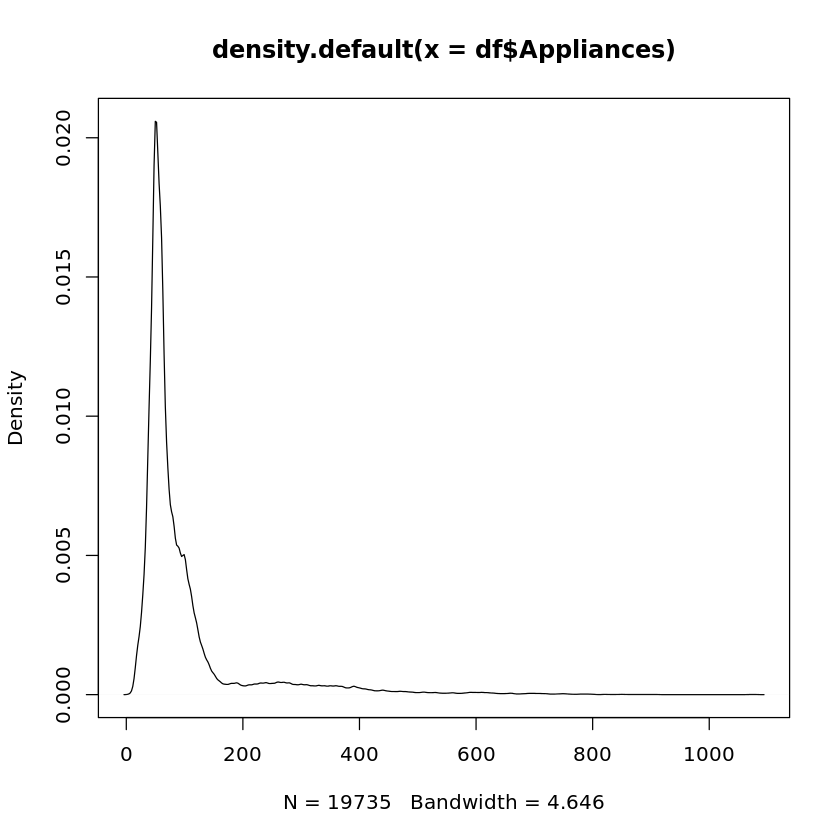

In [0]:
# plotting the important features
plot(density(df$Appliances))

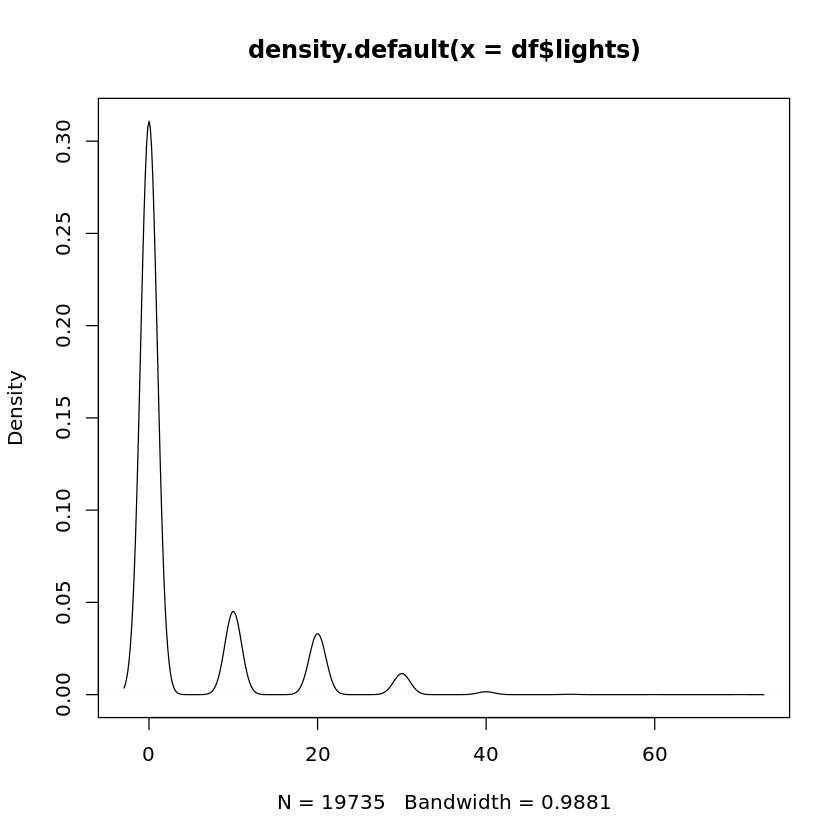

In [0]:
plot(density(df$lights))

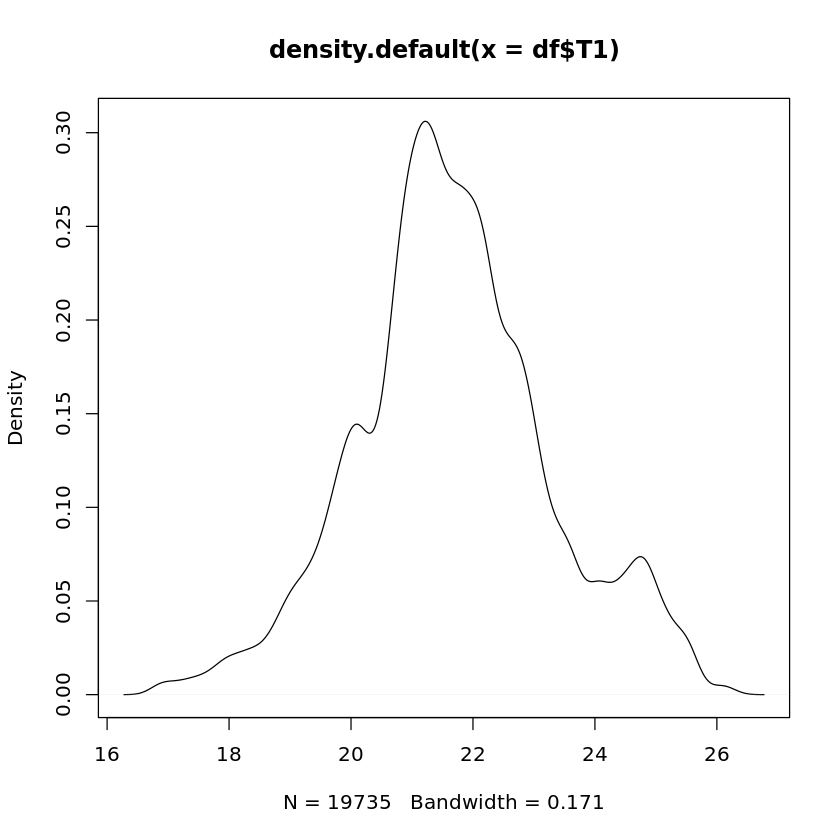

In [0]:
plot(density(df$T1))

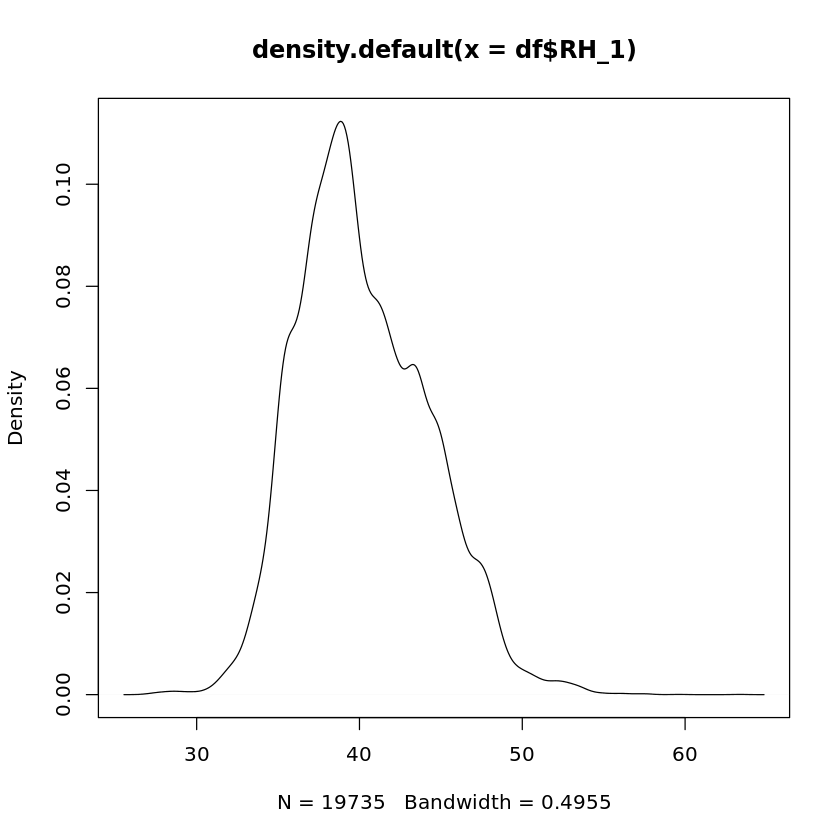

In [0]:
plot(density(df$RH_1))

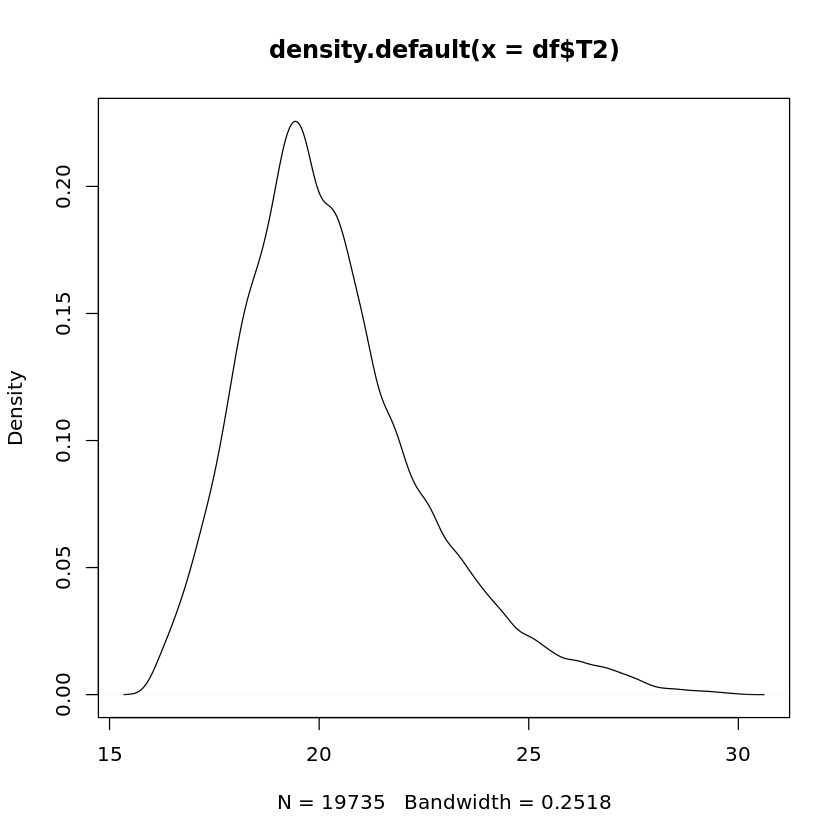

In [0]:
plot(density(df$T2))

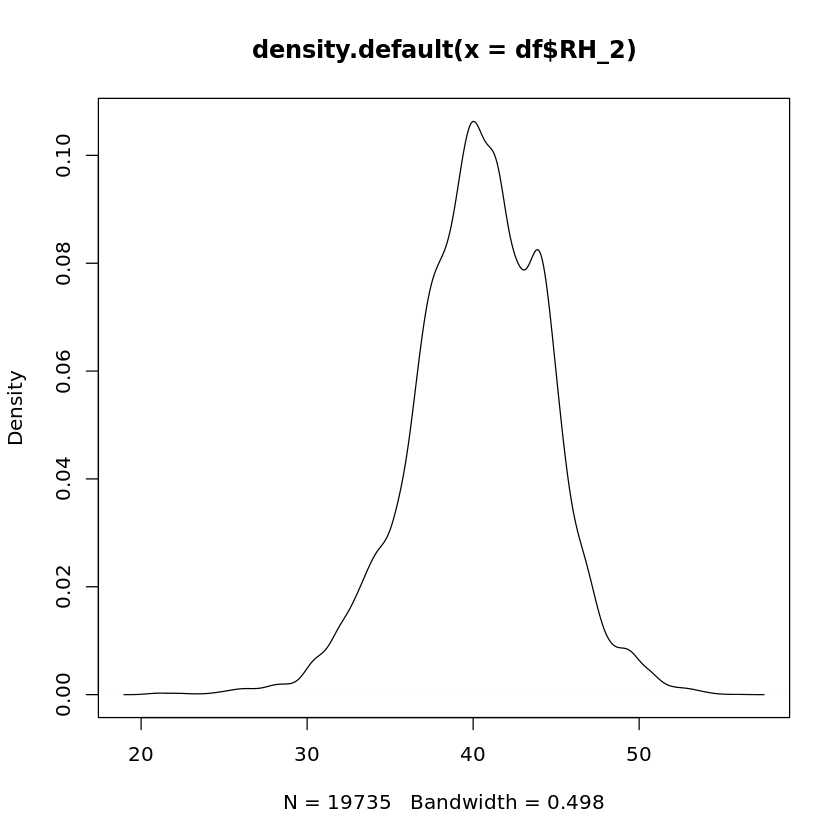

In [0]:
plot(density(df$RH_2))

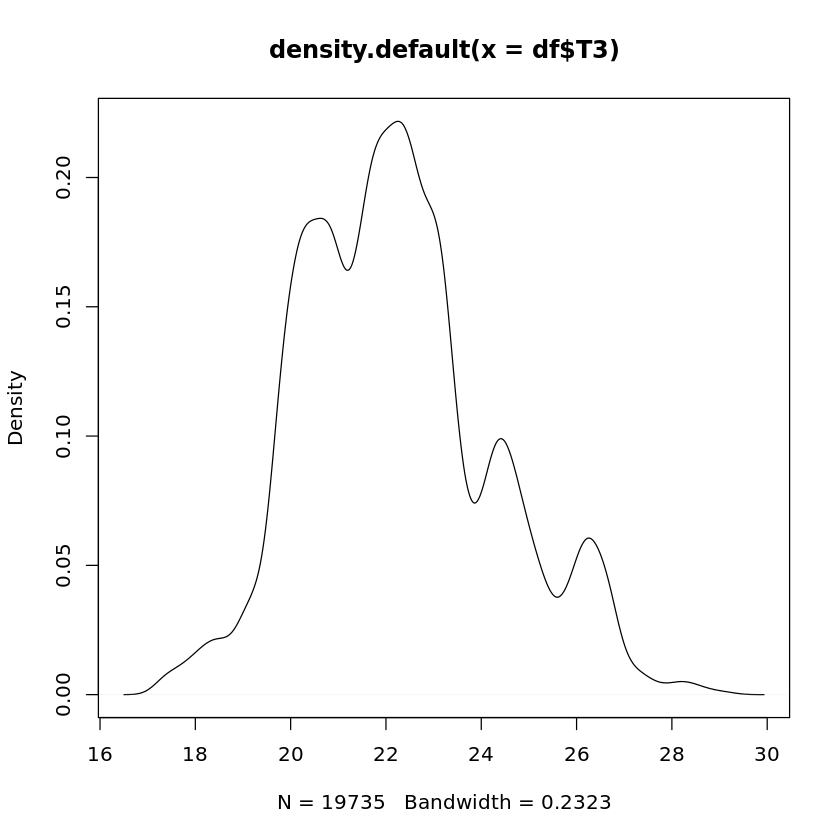

In [0]:
plot(density(df$T3))

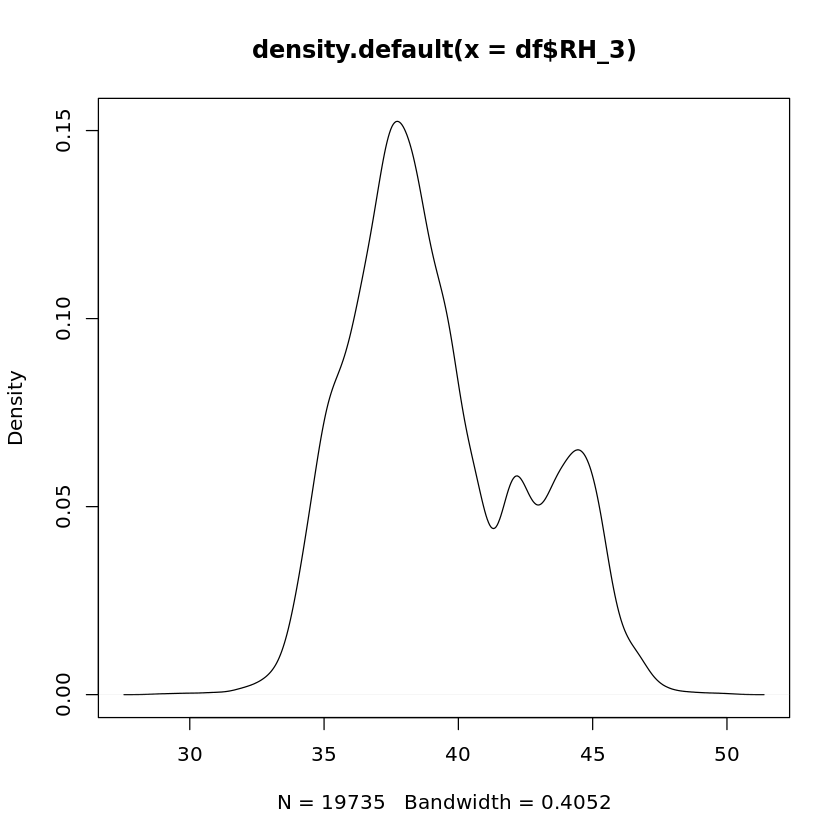

In [0]:
plot(density(df$RH_3))

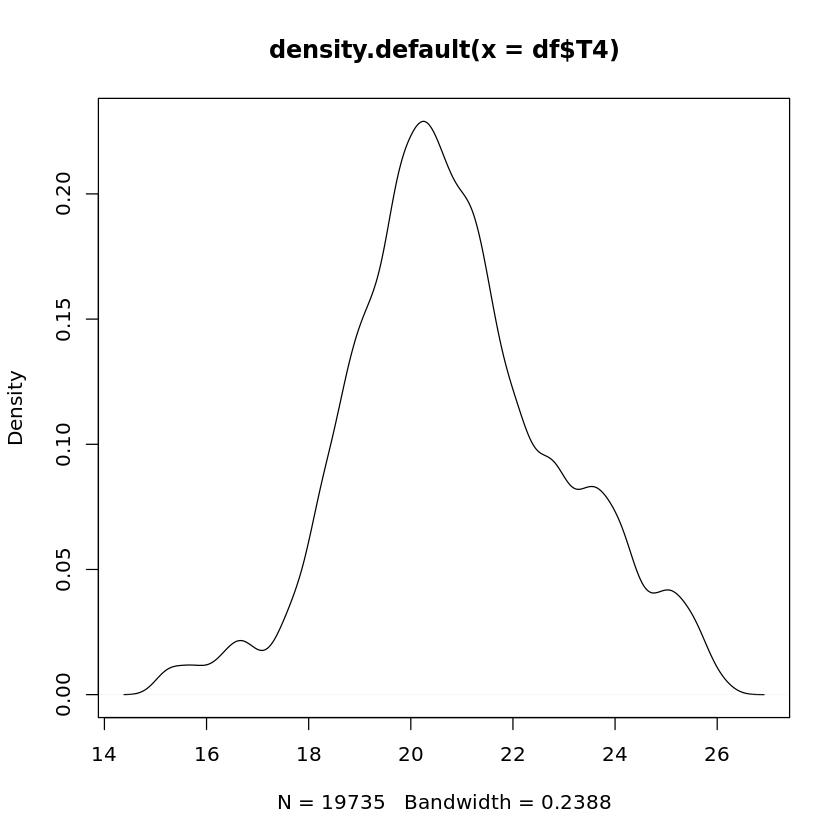

In [0]:
plot(density(df$T4))

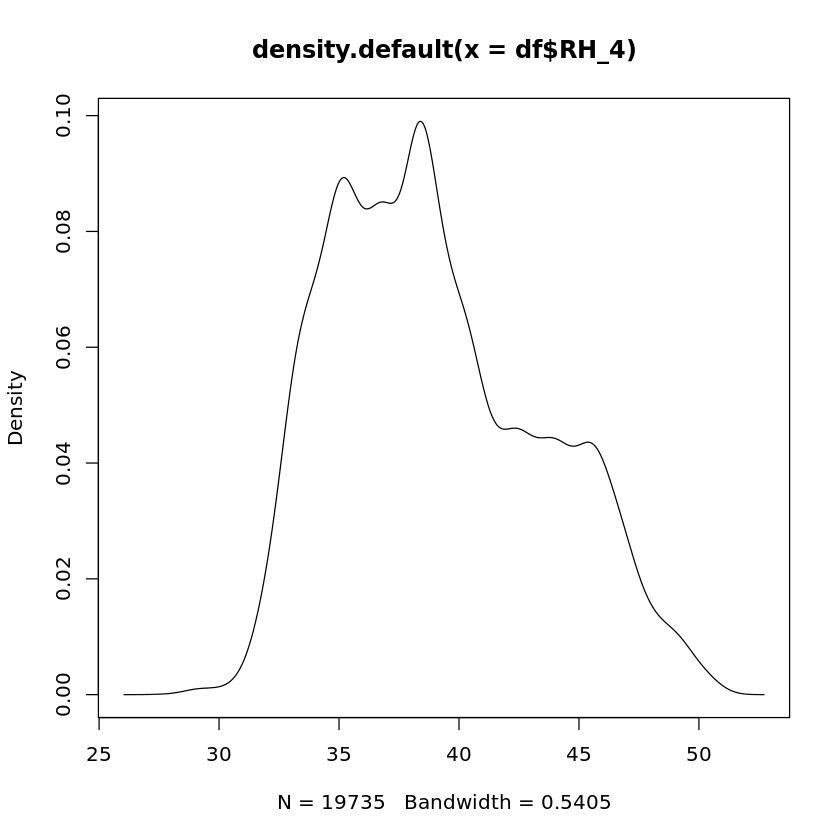

In [0]:
plot(density(df$RH_4))

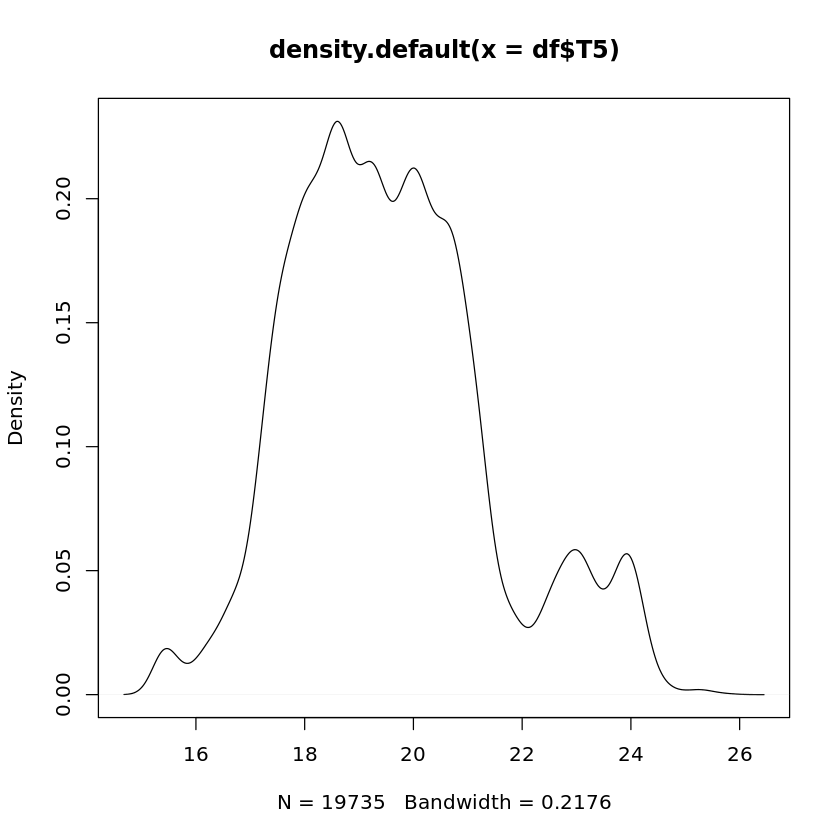

In [0]:
plot(density(df$T5))

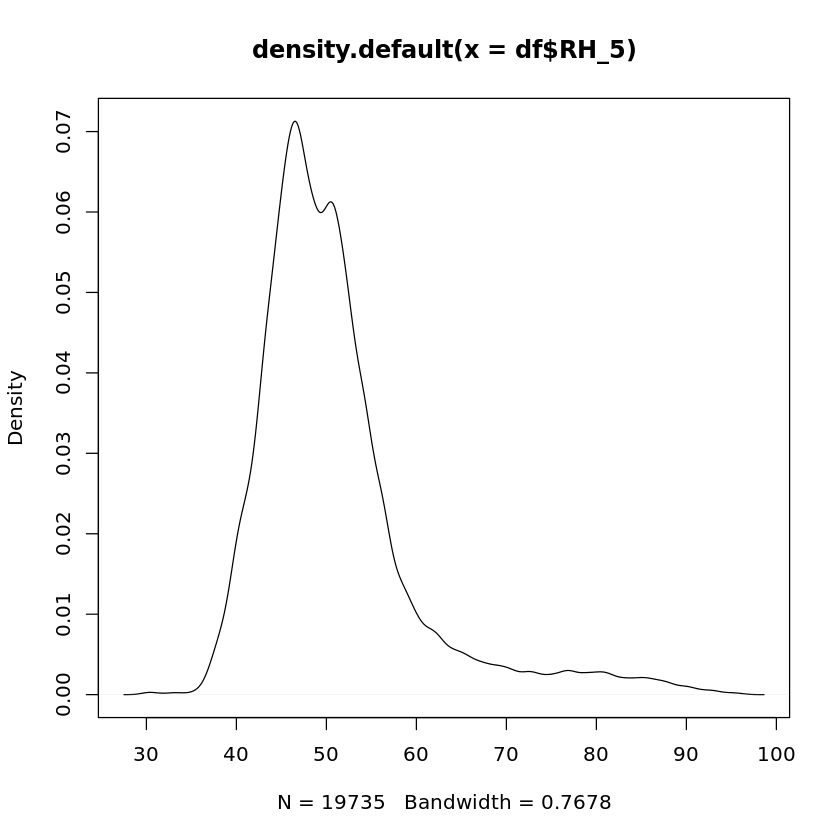

In [0]:
plot(density(df$RH_5))

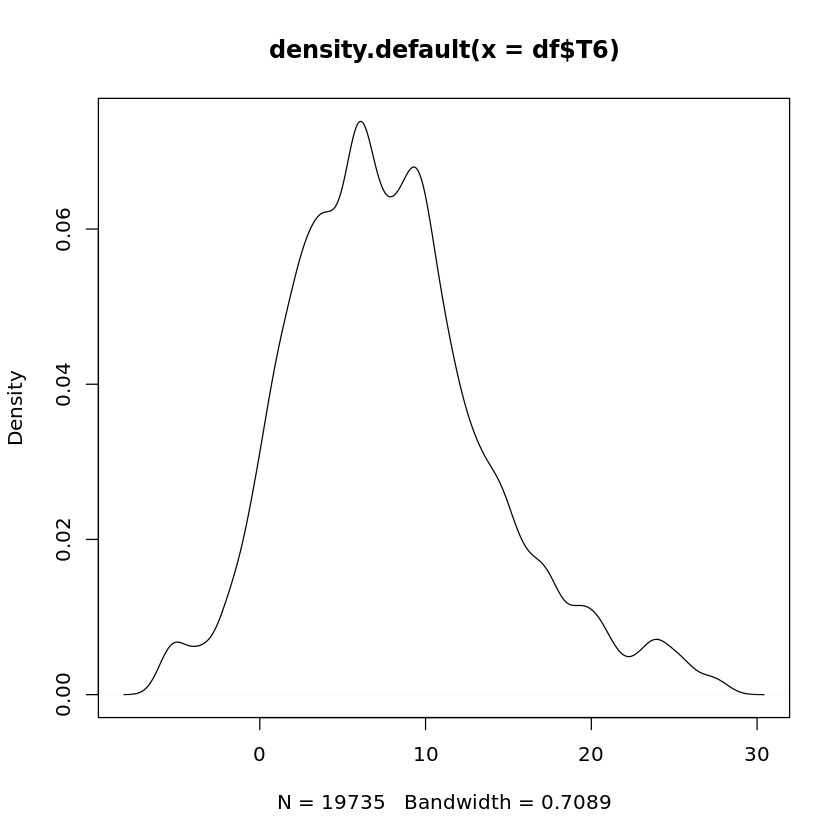

In [0]:
plot(density(df$T6))

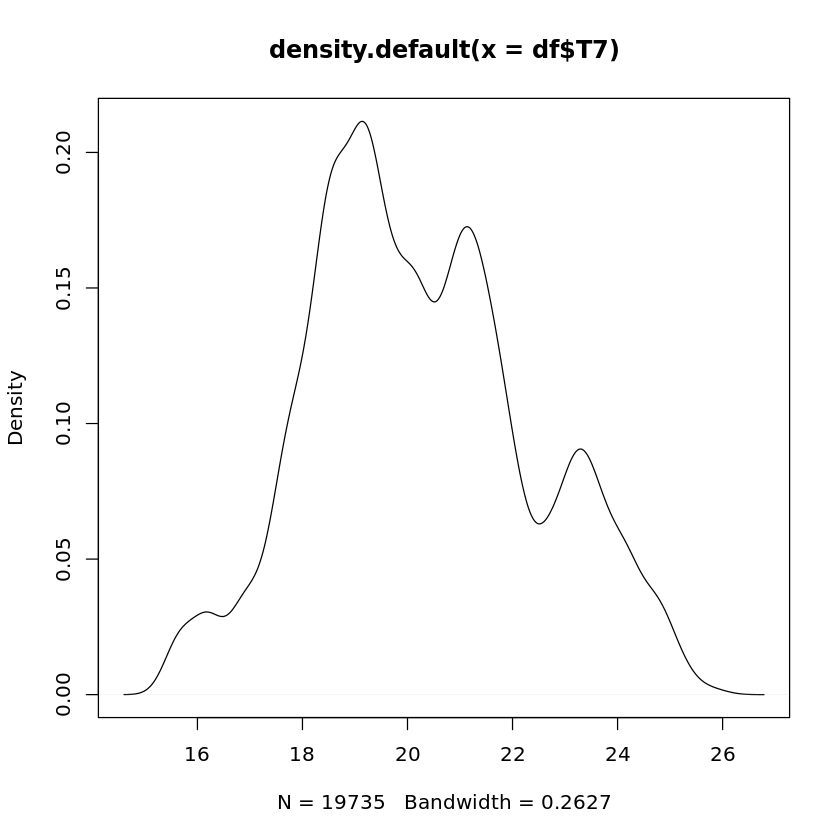

In [0]:
plot(density(df$T7))

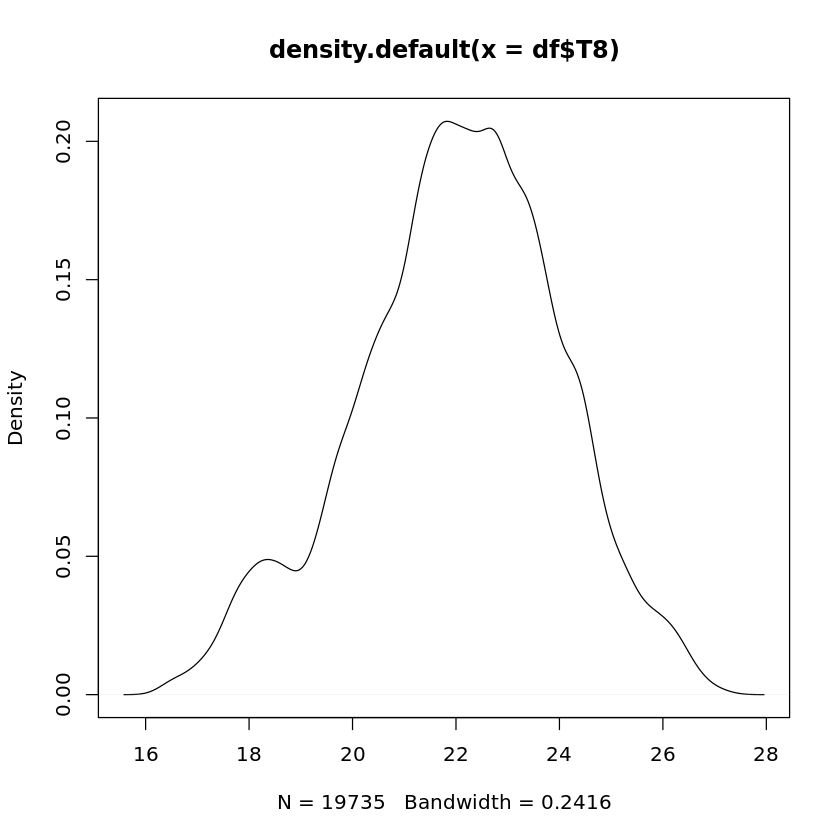

In [0]:
plot(density(df$T8))

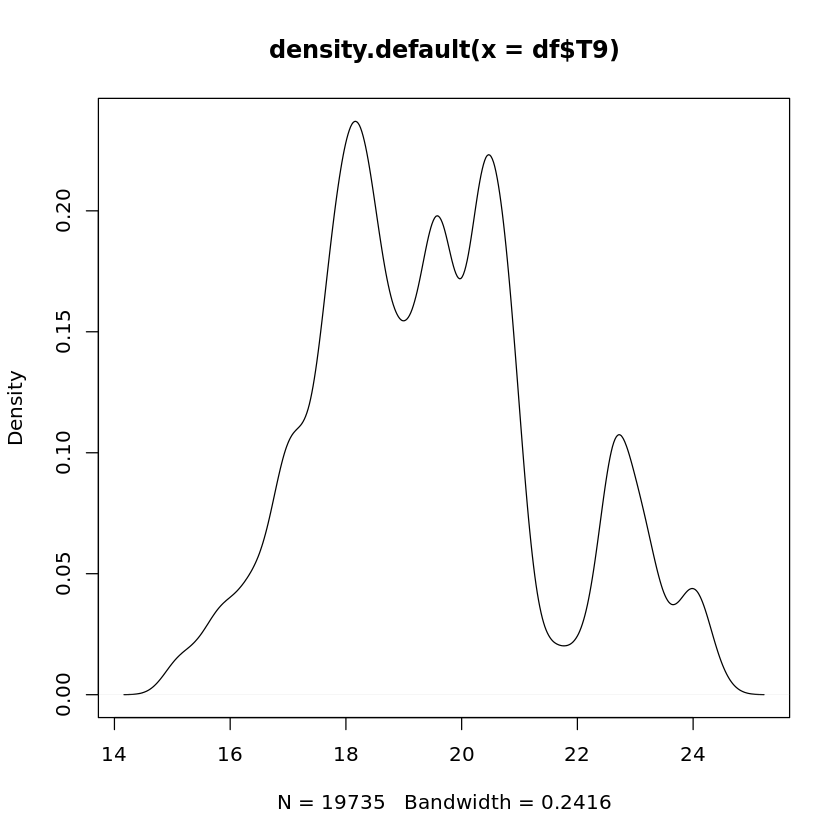

In [0]:
plot(density(df$T9))

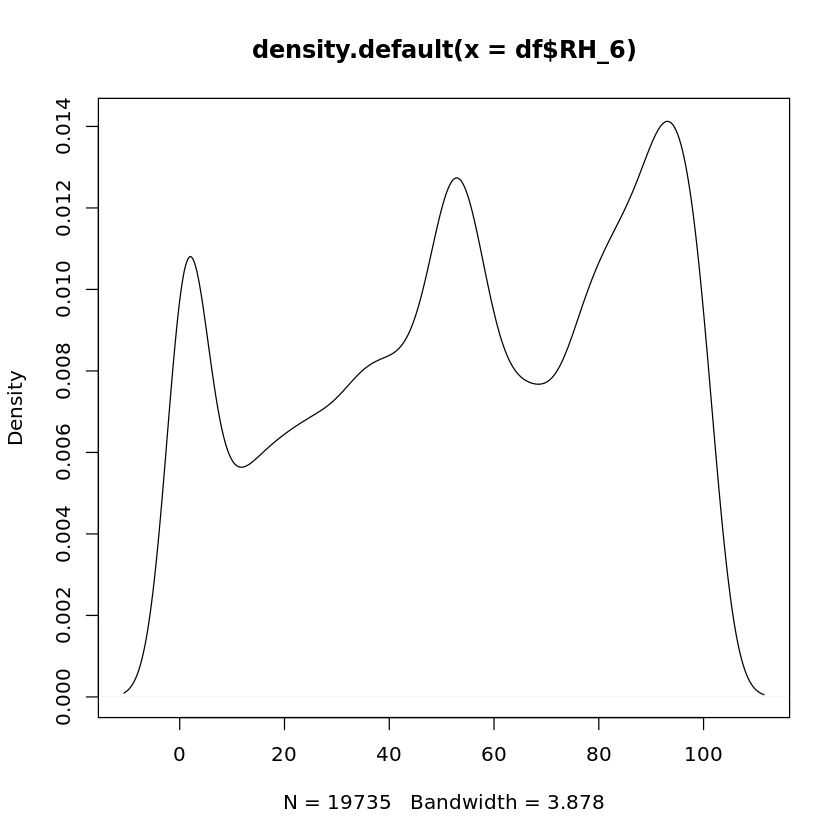

In [0]:
plot(density(df$RH_6))

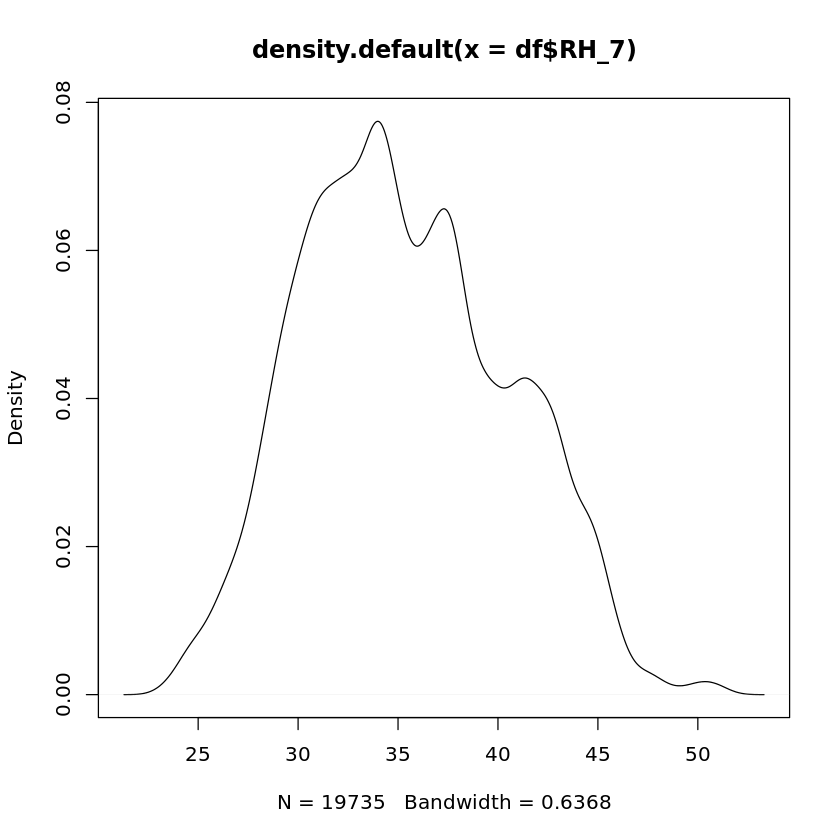

In [0]:
plot(density(df$RH_7))

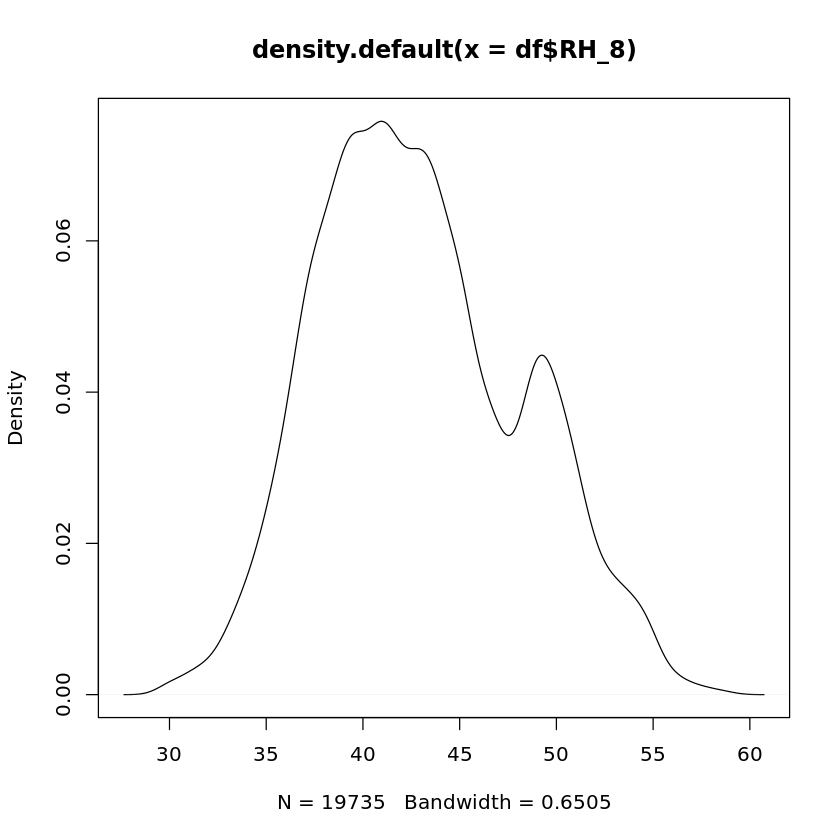

In [0]:
plot(density(df$RH_8))

In [0]:
library(ggplot2)
library(gridExtra)

In [0]:
# In bivariate analysis we check the association between two variables

# numeric to numeric relation
# numeric to categorical 
# categorical to categorical


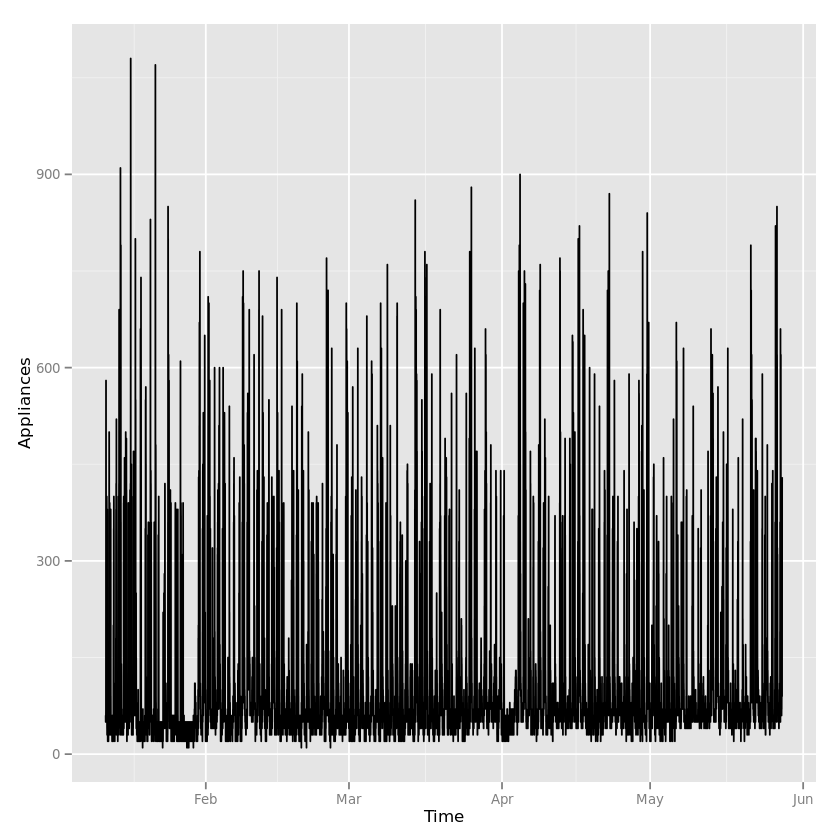

In [0]:
qplot(df$date,df$Appliances,xlab='Time',ylab='Appliances',geom='line')+theme_grey(base_size = 10)

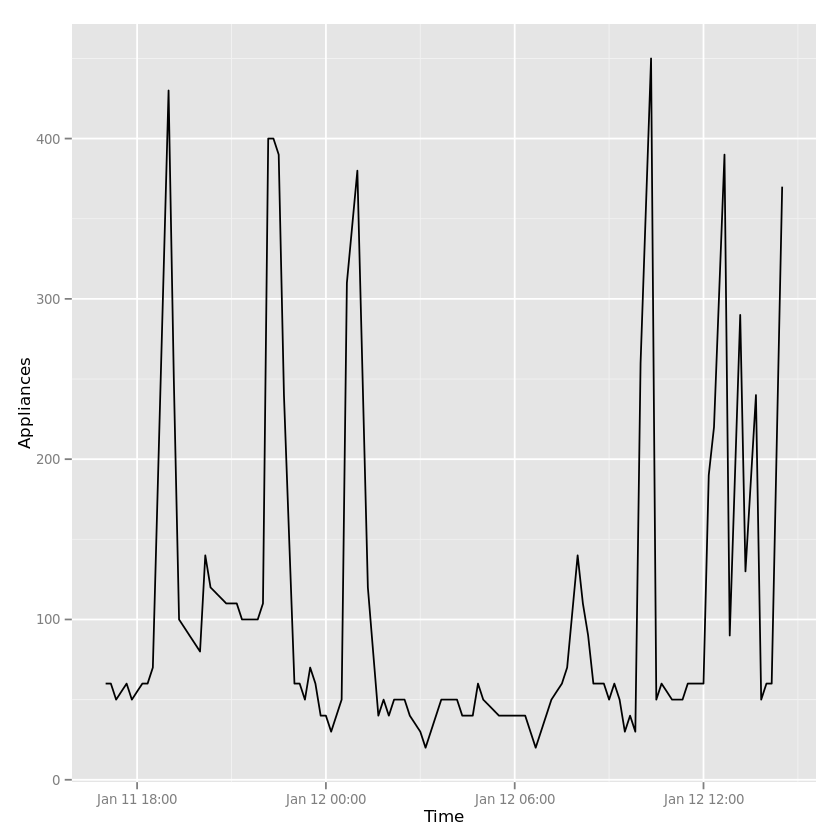

In [0]:
qplot(df$date[1:100],df$Appliances[1:100],xlab='Time',ylab='Appliances',geom='line')+theme_grey(base_size = 10)

[1] 19735    32

[1] 2138

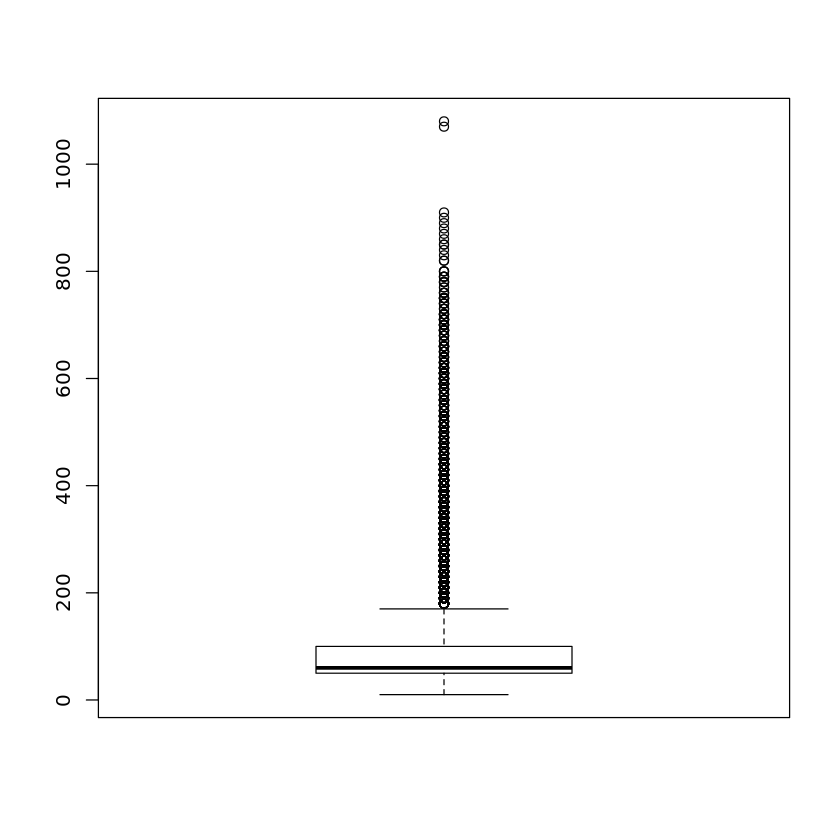

In [0]:
# define and compute the outliers
# x < Q1-1.5 * IQR
# x > Q3+1.5 * IQR
dim(df)
length((boxplot(df$Appliances))$out)


[1] 19735    32

[1] 4483

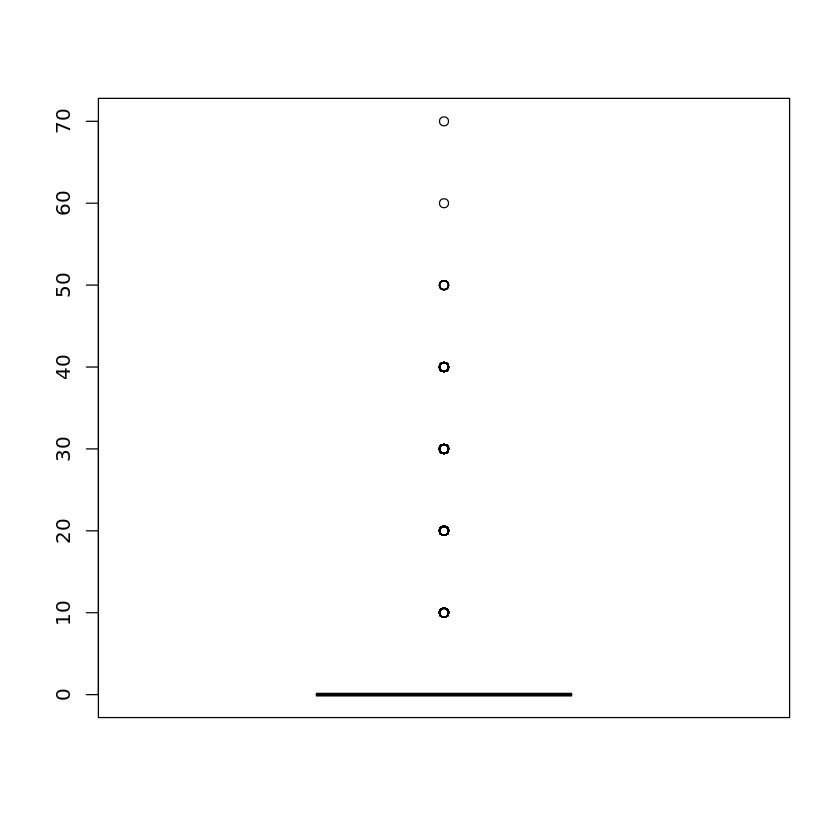

In [0]:
dim(df)
length((boxplot(df$lights))$out)


[1] 19735    32

[1] 515

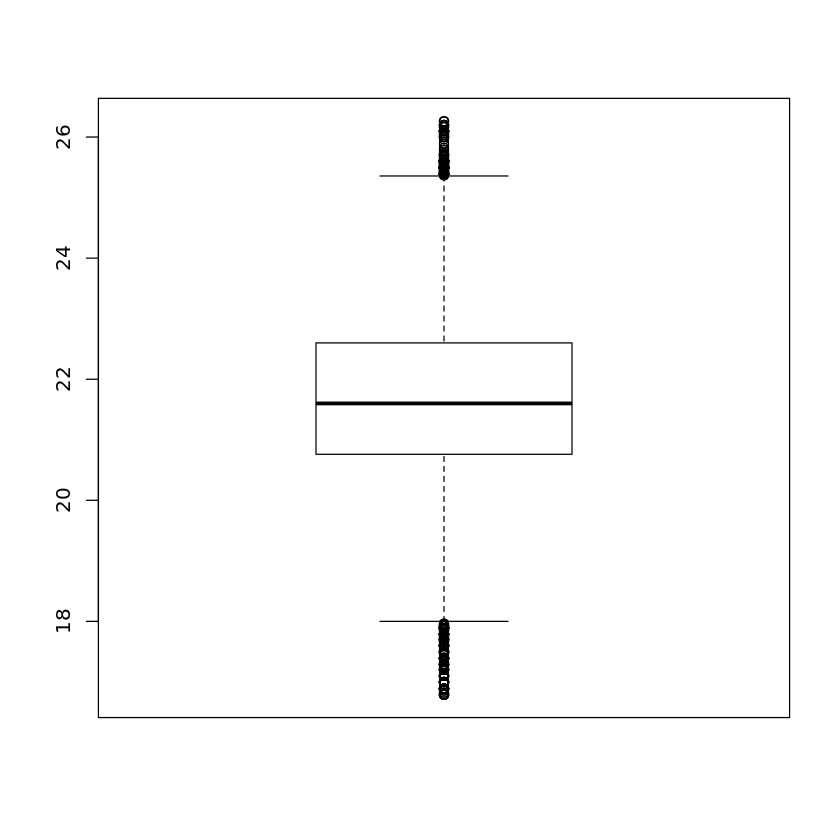

In [0]:
dim(df)
length((boxplot(df$T1))$out)


[1] 19735    32

[1] 546

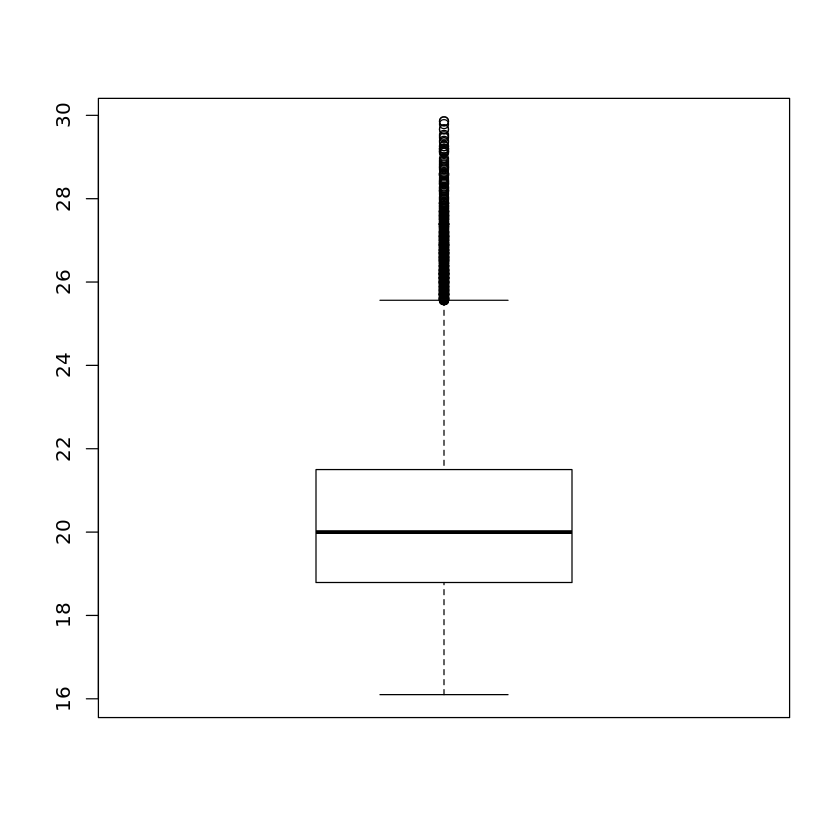

In [0]:
dim(df)
length((boxplot(df$T2))$out)


[1] 19735    32

[1] 217

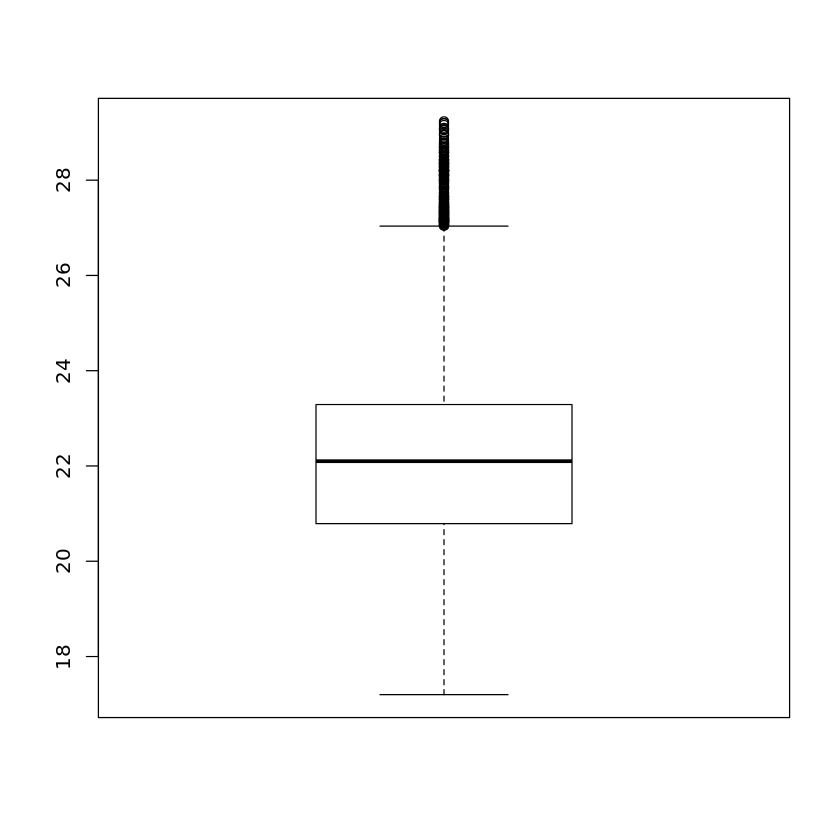

In [0]:
dim(df)
length((boxplot(df$T3))$out)


[1] 19735    32

[1] 186

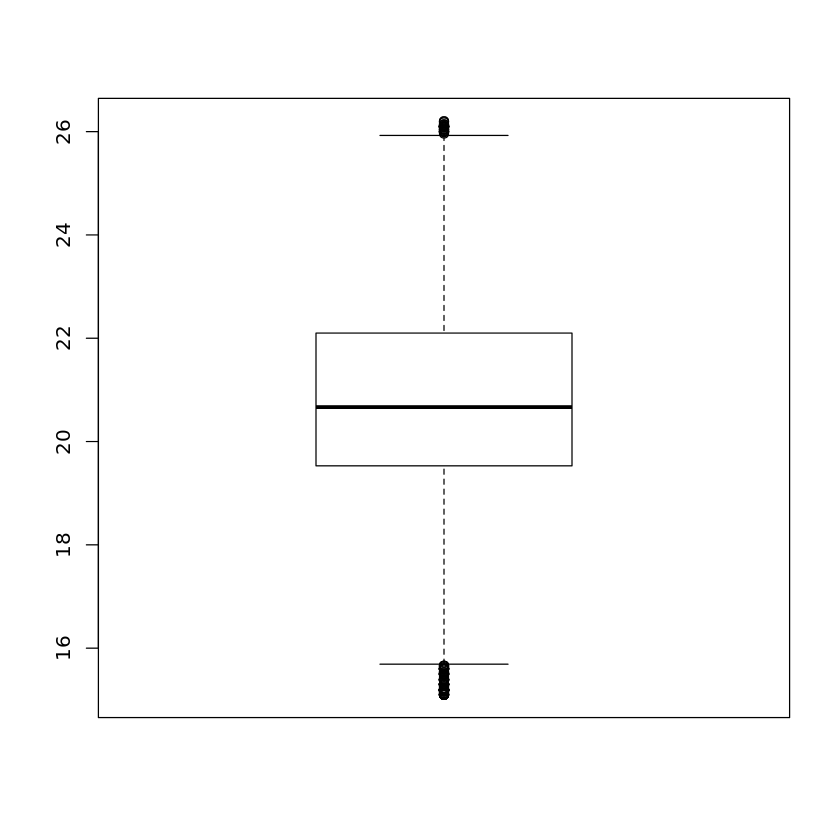

In [0]:
dim(df)
length((boxplot(df$T4))$out)


[1] 19735    32

[1] 186

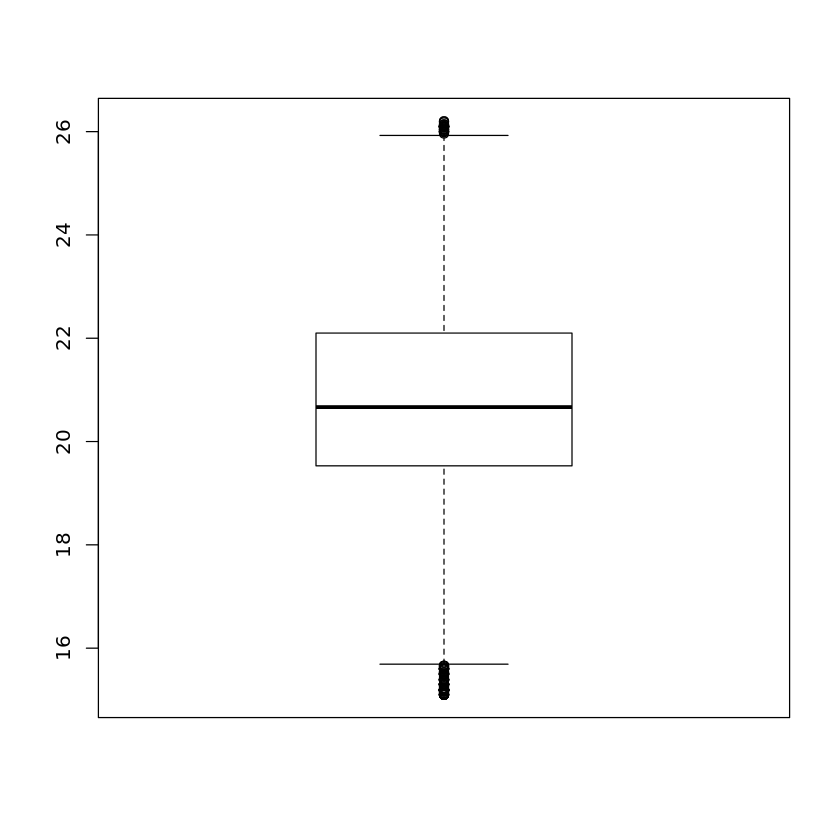

In [0]:
dim(df)
length((boxplot(df$T4))$out)


[1] 19735    32

[1] 179

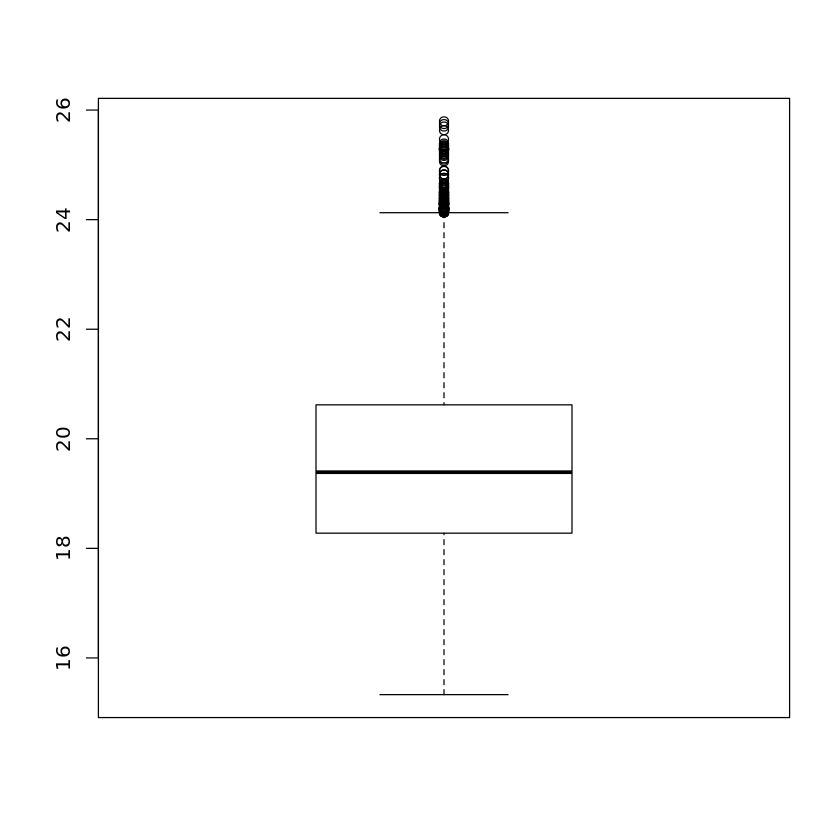

In [0]:
dim(df)
length((boxplot(df$T5))$out)


[1] 19735    32

[1] 515

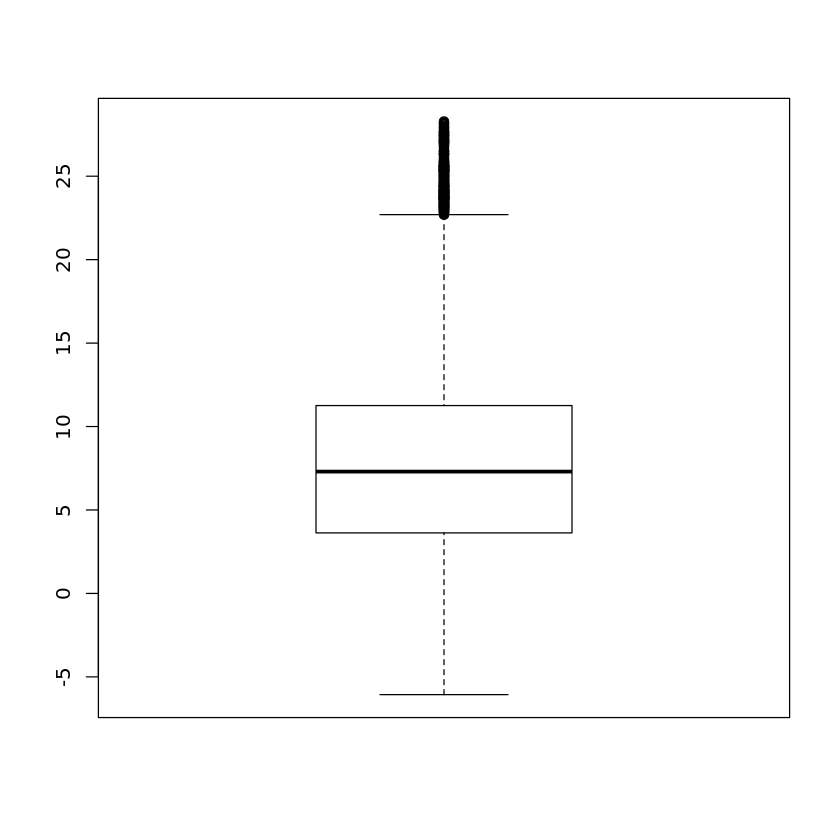

In [0]:
dim(df)
length((boxplot(df$T6))$out)


[1] 19735    32

[1] 2

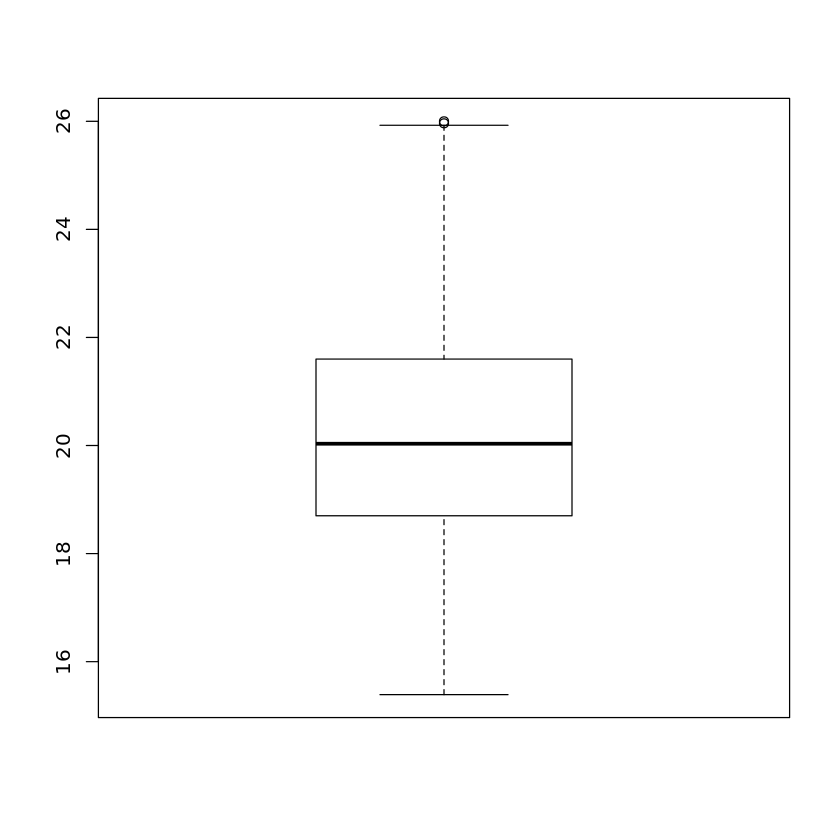

In [0]:
dim(df)
length((boxplot(df$T7))$out)


[1] 19735    32

[1] 71

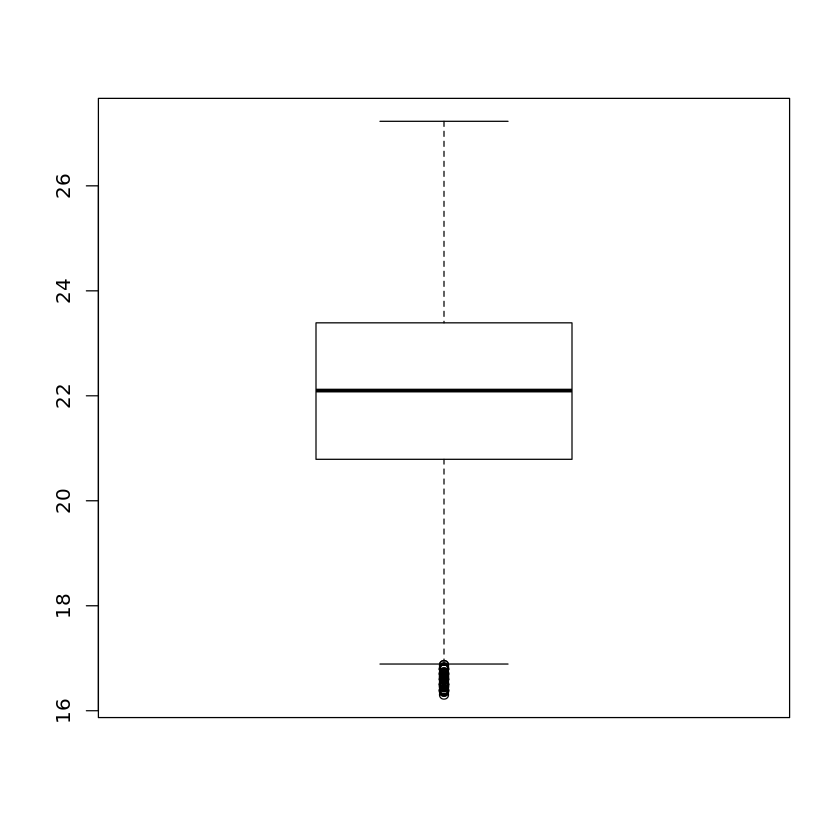

In [0]:
dim(df)
length((boxplot(df$T8))$out)


[1] 19735    32

[1] 0

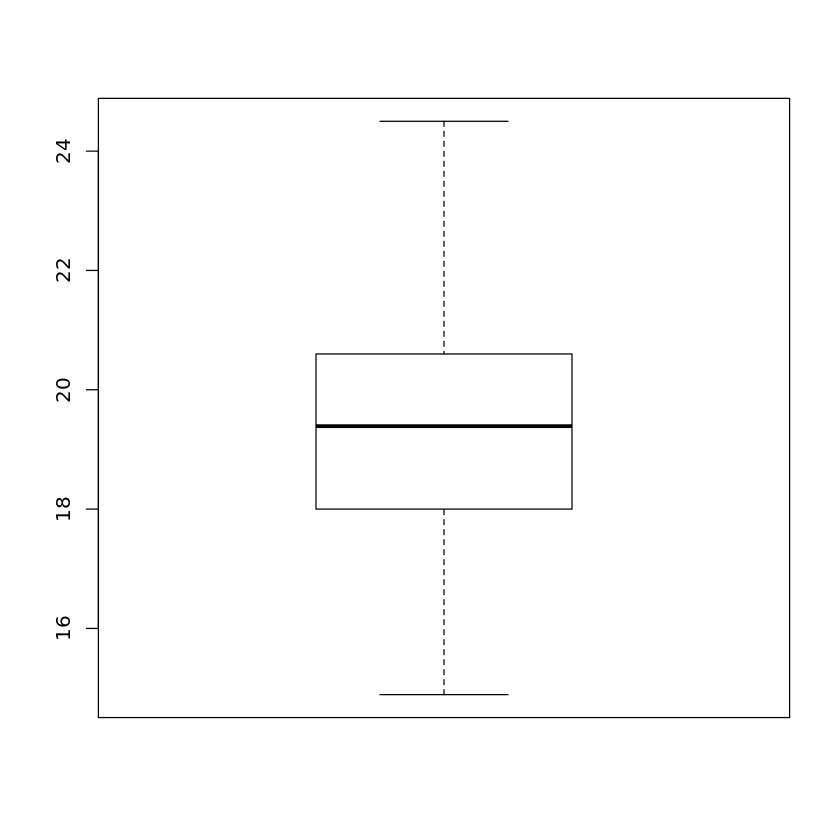

In [0]:
dim(df)
length((boxplot(df$T9))$out)


[1] 19735    32

[1] 146

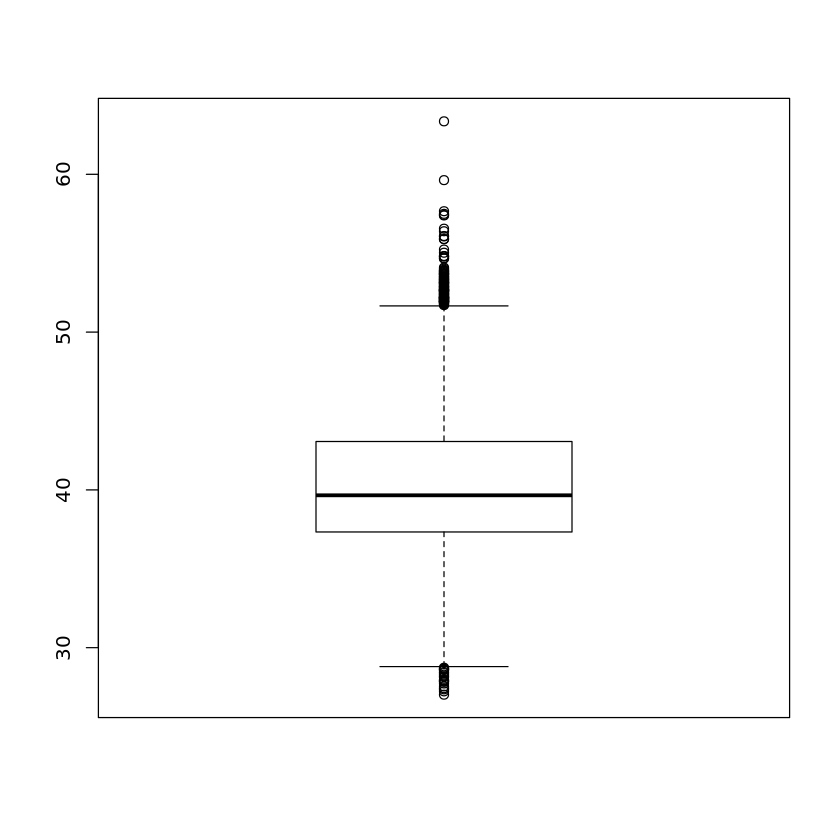

In [0]:
dim(df)
length((boxplot(df$RH_1))$out)


In [0]:
# Energy usage by week and month and hour representation
str(df)

'data.frame':	19735 obs. of  34 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : num  48.9 4

In [0]:
df$month <- floor_date(df$date,'month')

In [0]:
df$mhm <- floor_date(df$date,'hour')

In [0]:
library(plyr)

In [0]:
# Energy usage per hour
ddply(df,'mhm',summarise,Appliances = sum(Appliances))

mhm                 Appliances
1    2016-01-11 17:00:00  330      
2    2016-01-11 18:00:00 1060      
3    2016-01-11 19:00:00 1040      
4    2016-01-11 20:00:00  750      
5    2016-01-11 21:00:00  620      
6    2016-01-11 22:00:00 1600      
7    2016-01-11 23:00:00  340      
8    2016-01-12 00:00:00  850      
9    2016-01-12 01:00:00 1010      
10   2016-01-12 02:00:00  270      
11   2016-01-12 03:00:00  210      
12   2016-01-12 04:00:00  270      
13   2016-01-12 05:00:00  260      
14   2016-01-12 06:00:00  240      
15   2016-01-12 07:00:00  340      
16   2016-01-12 08:00:00  520      
17   2016-01-12 09:00:00  260      
18   2016-01-12 10:00:00 1380      
19   2016-01-12 11:00:00  330      
20   2016-01-12 12:00:00 1120      
21   2016-01-12 13:00:00  910      
22   2016-01-12 14:00:00  820      
23   2016-01-12 15:00:00  220      
24   2016-01-12 16:00:00  240      
25   2016-01-12 17:00:00 1310      
26   2016-01-12 18:00:00  350      
27   2016-01-12 19:00:00  330      
28   2016-01-12 20:00:00  310      
29   2016-01-12 21:00:00  250      
30   2016-01-12 22:00:00  280      
⋮    ⋮                   ⋮         
3261 2016-05-26 13:00:00  450      
3262 2016-05-26 14:00:00  410      
3263 2016-05-26 15:00:00  370      
3264 2016-05-26 16:00:00 2970      
3265 2016-05-26 17:00:00 2640      
3266 2016-05-26 18:00:00 1290      
3267 2016-05-26 19:00:00 1340      
3268 2016-05-26 20:00:00  550      
3269 2016-05-26 21:00:00  460      
3270 2016-05-26 22:00:00  420      
3271 2016-05-26 23:00:00  390      
3272 2016-05-27 00:00:00  360      
3273 2016-05-27 01:00:00  350      
3274 2016-05-27 02:00:00  300      
3275 2016-05-27 03:00:00  350      
3276 2016-05-27 04:00:00  350      
3277 2016-05-27 05:00:00  350      
3278 2016-05-27 06:00:00  380      
3279 2016-05-27 07:00:00  670      
3280 2016-05-27 08:00:00  780      
3281 2016-05-27 09:00:00 1510      
3282 2016-05-27 10:00:00 1510      
3283 2016-05-27 11:00:00 1860      
3284 2016-05-27 12:00:00 1110      
3285 2016-05-27 13:00:00 1590      
3286 2016-05-27 14:00:00  610      
3287 2016-05-27 15:00:00  460      
3288 2016-05-27 16:00:00  810      
3289 2016-05-27 17:00:00 1080      
3290 2016-05-27 18:00:00  430

In [0]:
wday(df$mhm,,label = T)

[1] Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon  
   [13] Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon  
   [25] Mon   Mon   Mon   Mon   Mon   Mon   Mon   Mon   Tues  Tues  Tues  Tues 
   [37] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
   [49] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
   [61] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
   [73] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
   [85] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
   [97] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
  [109] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
  [121] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues 
  [133] Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Tues  Wed   Wed  
  [145] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [157] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [169] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [181] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [193] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [205] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [217] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [229] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [241] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed  
  [253] Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Wed   Thurs Thurs Thurs
  [265] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [277] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [289] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [301] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [313] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [325] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [337] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [349] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs
  [361] Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Thurs Fri   Fri   Fri  
  [373] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [385] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [397] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [409] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [421] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [433] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [445] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [457] Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri   Fri  
  [469] Fri   Fri   Fri   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [481] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [493] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [505] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [517] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [529] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [541] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [553] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sat  
  [565] Sat   Sat   Sat   Sat   Sat   Sat   Sat   Sun   Sun   Sun   Sun   Sun  
  [577] Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun  
  [589] Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun   Sun  
  [6

In [0]:
week(df$mhm)

[1]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   [25]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   [49]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   [73]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
   [97]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [121]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [145]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [169]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [193]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [217]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [241]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [265]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [289]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [313]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [337]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [361]  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [385]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [409]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [433]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [457]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [481]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [505]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [529]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [553]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [577]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [601]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [625]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [649]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [673]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [697]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [721]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [745]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [769]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [793]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [817]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [841]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [865]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [889]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [913]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [937]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [961]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  [985]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1009]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1033]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1057]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1081]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [1105]  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [1129]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [1153]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [1177]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [12

In [0]:
unique(week(df$mhm))

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


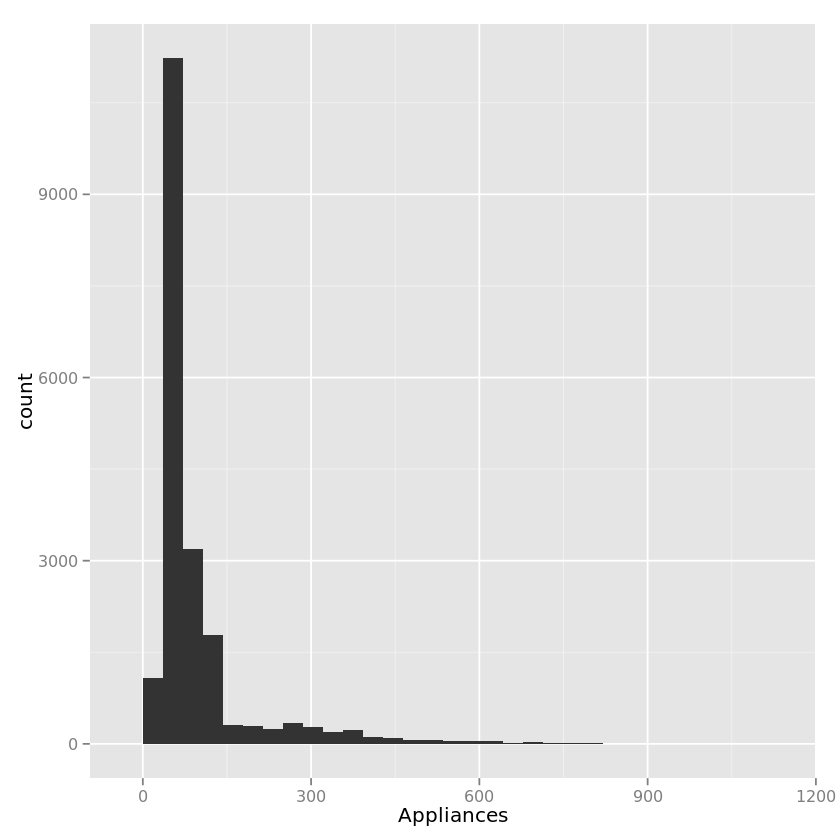

In [0]:
ggplot(df,aes(x=Appliances)) + geom_histogram()

In [0]:
names(df)

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week" "month"       "mhm"

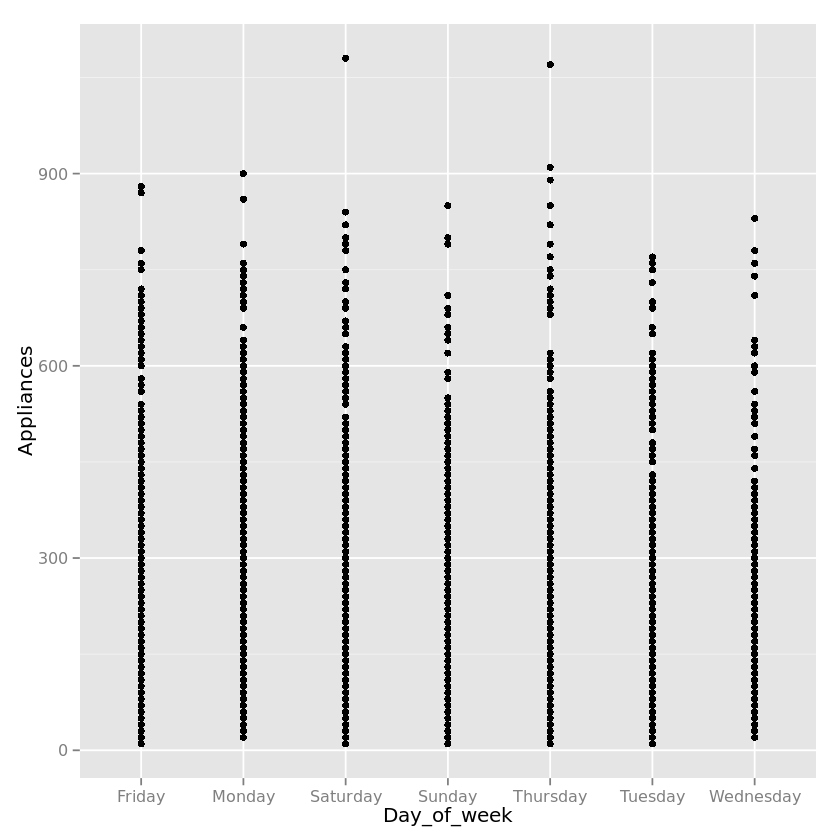

In [0]:
ggplot(df,aes(x=Day_of_week,y=Appliances,fill=mhm)) + geom_point()

In [0]:
library(dplyr)
names(df)

# select()
# filter()
# arrange()
# mutate()
# summarise()
# group_by()

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week" "month"       "mhm"

In [0]:
select(df,Appliances,Day_of_week)

Appliances Day_of_week
1      60        Monday     
2      60        Monday     
3      50        Monday     
4      60        Monday     
5      50        Monday     
6      60        Monday     
7      60        Monday     
8      70        Monday     
9     430        Monday     
10    250        Monday     
11    100        Monday     
12     90        Monday     
13     80        Monday     
14    140        Monday     
15    120        Monday     
16    110        Monday     
17    110        Monday     
18    110        Monday     
19    100        Monday     
20    100        Monday     
21    100        Monday     
22    110        Monday     
23    400        Monday     
24    400        Monday     
25    390        Monday     
26    240        Monday     
27     60        Monday     
28     60        Monday     
29     50        Monday     
30     70        Monday     
⋮     ⋮          ⋮          
19706 620        Thursday   
19707 260        Thursday   
19708  80        Thursday   
19709  80        Thursday   
19710  70        Thursday   
19711  70        Thursday   
19712  60        Thursday   
19713  60        Thursday   
19714  60        Thursday   
19715  70        Friday     
19716  60        Friday     
19717  60        Friday     
19718  40        Friday     
19719  60        Friday     
19720  50        Friday     
19721  60        Friday     
19722  60        Friday     
19723  50        Friday     
19724  50        Friday     
19725  50        Friday     
19726  70        Friday     
19727  90        Friday     
19728  70        Friday     
19729 260        Friday     
19730 190        Friday     
19731 230        Friday     
19732  60        Friday     
19733 100        Friday     
19734 100        Friday     
19735 270        Friday

In [0]:
select(df, NSM:mhm)

NSM   WeekStatus Day_of_week month      mhm                
1     61200 Weekday    Monday      2016-01-01 2016-01-11 17:00:00
2     61800 Weekday    Monday      2016-01-01 2016-01-11 17:00:00
3     62400 Weekday    Monday      2016-01-01 2016-01-11 17:00:00
4     63600 Weekday    Monday      2016-01-01 2016-01-11 17:00:00
5     64200 Weekday    Monday      2016-01-01 2016-01-11 17:00:00
6     65400 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
7     66000 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
8     66600 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
9     68400 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
10    69000 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
11    69600 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
12    70800 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
13    72000 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
14    72600 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
15    73200 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
16    75000 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
17    75600 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
18    76200 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
19    76800 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
20    78000 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
21    78600 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
22    79200 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
23    79800 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
24    80400 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
25    81000 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
26    81600 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
27    82800 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
28    83400 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
29    84000 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
30    84600 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
⋮     ⋮     ⋮          ⋮           ⋮          ⋮                  
19706 61800 Weekday    Thursday    2016-05-01 2016-05-26 17:00:00
19707 69000 Weekday    Thursday    2016-05-01 2016-05-26 19:00:00
19708 77400 Weekday    Thursday    2016-05-01 2016-05-26 21:00:00
19709 78600 Weekday    Thursday    2016-05-01 2016-05-26 21:00:00
19710 79200 Weekday    Thursday    2016-05-01 2016-05-26 22:00:00
19711 81000 Weekday    Thursday    2016-05-01 2016-05-26 22:00:00
19712 81600 Weekday    Thursday    2016-05-01 2016-05-26 22:00:00
19713 82800 Weekday    Thursday    2016-05-01 2016-05-26 23:00:00
19714 84000 Weekday    Thursday    2016-05-01 2016-05-26 23:00:00
19715   600 Weekday    Friday      2016-05-01 2016-05-27 00:00:00
19716  3600 Weekday    Friday      2016-05-01 2016-05-27 01:00:00
19717  4200 Weekday    Friday      2016-05-01 2016-05-27 01:00:00
19718  8400 Weekday    Friday      2016-05-01 2016-05-27 02:00:00
19719  9000 Weekday    Friday      2016-05-01 2016-05-27 02:00:00
19720  9600 Weekday    Friday      2016-05-01 2016-05-27 02:00:00
19721 15600 Weekday    Friday      2016-05-01 2016-05-27 04:00:00
19722 18000 Weekday    Friday      2016-05-01 2016-05-27 05:00:00
19723 20400 Weekday    Friday      2016-05-01 2016-05-27 05:00:00
19724 21600 Weekday    Friday      2016-05-01 2016-05-27 06:00:00
19725 24600 Weekday    Friday      2016-05-01 2016-05-27 06:00:00
19726 30000 Weekday    Friday      2016-05-01 2016-05-27 08:00:00
19727 31800 Weekday    Friday      2016-05-01 2016-05-27 08:00:00
19728 33600 Weekday    Friday      2016-05-01 2016-05-27 09:00:00
19729 36600 Weekday    Friday      2016-05-01 2016-05-27 10:00:00
19730 39600 Weekday    Friday      2016-05-01 2016-05-27 11:00:00
19731 49800 Weekday    Friday      2016-05-01 2016-05-27 13:00:00
19732 52200 Weekday    Friday      2016-05-01 2016-05-27 14:00:00
19733 57000 Weekday    Friday      2016-05-01 2016-05-27 15:00:00
19734 62400 Weekday    Friday      2016-05-01 

In [0]:
df %>% select(NSM:mhm) %>% filter(Day_of_week=='Monday',NSM >= 65000)

NSM   WeekStatus Day_of_week month      mhm                
1   65400 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
2   66000 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
3   66600 Weekday    Monday      2016-01-01 2016-01-11 18:00:00
4   68400 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
5   69000 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
6   69600 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
7   70800 Weekday    Monday      2016-01-01 2016-01-11 19:00:00
8   72000 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
9   72600 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
10  73200 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
11  75000 Weekday    Monday      2016-01-01 2016-01-11 20:00:00
12  75600 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
13  76200 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
14  76800 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
15  78000 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
16  78600 Weekday    Monday      2016-01-01 2016-01-11 21:00:00
17  79200 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
18  79800 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
19  80400 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
20  81000 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
21  81600 Weekday    Monday      2016-01-01 2016-01-11 22:00:00
22  82800 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
23  83400 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
24  84000 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
25  84600 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
26  85200 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
27  85800 Weekday    Monday      2016-01-01 2016-01-11 23:00:00
28  67200 Weekday    Monday      2016-01-01 2016-01-18 18:00:00
29  68400 Weekday    Monday      2016-01-01 2016-01-18 19:00:00
30  69000 Weekday    Monday      2016-01-01 2016-01-18 19:00:00
⋮   ⋮     ⋮          ⋮           ⋮          ⋮                  
671 83400 Weekday    Monday      2016-05-01 2016-05-02 23:00:00
672 66600 Weekday    Monday      2016-05-01 2016-05-09 18:00:00
673 67200 Weekday    Monday      2016-05-01 2016-05-09 18:00:00
674 67800 Weekday    Monday      2016-05-01 2016-05-09 18:00:00
675 69000 Weekday    Monday      2016-05-01 2016-05-09 19:00:00
676 69600 Weekday    Monday      2016-05-01 2016-05-09 19:00:00
677 71400 Weekday    Monday      2016-05-01 2016-05-09 19:00:00
678 73800 Weekday    Monday      2016-05-01 2016-05-09 20:00:00
679 78600 Weekday    Monday      2016-05-01 2016-05-09 21:00:00
680 79200 Weekday    Monday      2016-05-01 2016-05-09 22:00:00
681 82200 Weekday    Monday      2016-05-01 2016-05-09 22:00:00
682 83400 Weekday    Monday      2016-05-01 2016-05-09 23:00:00
683 85200 Weekday    Monday      2016-05-01 2016-05-09 23:00:00
684 67800 Weekday    Monday      2016-05-01 2016-05-16 18:00:00
685 68400 Weekday    Monday      2016-05-01 2016-05-16 19:00:00
686 70200 Weekday    Monday      2016-05-01 2016-05-16 19:00:00
687 73200 Weekday    Monday      2016-05-01 2016-05-16 20:00:00
688 79200 Weekday    Monday      2016-05-01 2016-05-16 22:00:00
689 81000 Weekday    Monday      2016-05-01 2016-05-16 22:00:00
690 81600 Weekday    Monday      2016-05-01 2016-05-16 22:00:00
691 66000 Weekday    Monday      2016-05-01 2016-05-23 18:00:00
692 67800 Weekday    Monday      2016-05-01 2016-05-23 18:00:00
693 72600 Weekday    Monday      2016-05-01 2016-05-23 20:00:00
694 74400 Weekday    Monday      2016-05-01 2016-05-23 20:00:00
695 76800 Weekday    Monday      2016-05-01 2016-05-23 21:00:00
696 78600 Weekday    Monday      2016-05-01 2016-05-23 21:00:00
697 79200 Weekday    Monday      2016-05-01 2016-05-23 22:00:00
698 82800 Weekday    Monday      2016-05-01 2016-05-23 23:00:00
699 84600 Weekday    Monday      2016-05-01 2016-05-23 23:00:00
700 85200 Weekday    Monday      2016-05-01 2016-05-23 23:00:00

In [0]:
filter(df, Day_of_week == 'Monday', NSM > 65000)

date                Appliances lights T1       RH_1     T2       RH_2    
1   2016-01-11 18:10:00  60        50     19.85667 45.56000 19.20000 44.50000
2   2016-01-11 18:20:00  60        40     19.79000 45.59750 19.20000 44.43333
3   2016-01-11 18:30:00  70        40     19.85667 46.09000 19.23000 44.40000
4   2016-01-11 19:00:00 430        50     20.13333 48.00000 19.56667 44.40000
5   2016-01-11 19:10:00 250        40     20.26000 52.72667 19.73000 45.10000
6   2016-01-11 19:20:00 100        10     20.42667 55.89333 19.85667 45.83333
7   2016-01-11 19:40:00  90        10     20.73000 52.66000 20.16667 47.22333
8   2016-01-11 20:00:00  80        30     20.89000 51.19333 20.20000 46.33000
9   2016-01-11 20:10:00 140        40     20.89000 49.80000 20.20000 46.02667
10  2016-01-11 20:20:00 120        20     20.89000 48.43333 20.20000 45.72250
11  2016-01-11 20:50:00 110        40     21.10000 46.59667 20.35667 44.96333
12  2016-01-11 21:00:00 110        30     21.13333 46.06000 20.42667 44.76000
13  2016-01-11 21:10:00 110        20     21.20000 45.80000 20.50000 44.76000
14  2016-01-11 21:20:00 100        30     21.29000 45.90000 20.53333 45.09000
15  2016-01-11 21:40:00 100        20     21.39000 45.69000 20.70000 45.06000
16  2016-01-11 21:50:00 100        20     21.50000 45.33333 20.70000 44.93333
17  2016-01-11 22:00:00 110        20     21.50000 45.12667 20.79000 44.63333
18  2016-01-11 22:10:00 400        20     21.53333 44.96667 20.79000 44.36000
19  2016-01-11 22:20:00 400        20     21.60000 44.76667 20.89000 44.22333
20  2016-01-11 22:30:00 390        30     21.60000 44.56000 20.96333 43.96333
21  2016-01-11 22:40:00 240        20     21.60000 44.36000 21.00000 43.83333
22  2016-01-11 23:00:00  60        20     21.60000 44.20000 21.00000 43.59000
23  2016-01-11 23:10:00  60        20     21.60000 44.20000 21.00000 43.59000
24  2016-01-11 23:20:00  50        10     21.60000 44.20000 21.00000 43.70000
25  2016-01-11 23:30:00  70        20     21.50000 44.23000 20.92667 43.76000
26  2016-01-11 23:40:00  60        20     21.50000 44.36333 20.89000 43.84500
27  2016-01-11 23:50:00  40        20     21.39000 44.43333 20.79000 43.79000
28  2016-01-18 18:40:00 510         0     19.10000 41.00000 17.79000 41.46333
29  2016-01-18 19:00:00 300        20     19.10000 41.46667 17.92667 41.86000
30  2016-01-18 19:10:00 350        10     19.23000 41.56667 18.06667 42.06000
⋮   ⋮                   ⋮          ⋮      ⋮        ⋮        ⋮        ⋮       
671 2016-05-02 23:10:00  70         0     22.50000 39.00000 20.96333 39.62667
672 2016-05-09 18:30:00 120        20     25.60000 43.56667 25.70000 38.65667
673 2016-05-09 18:40:00 160        30     25.60000 43.13333 25.70000 38.86333
674 2016-05-09 18:50:00 110        20     25.60000 42.86000 25.70000 38.70000
675 2016-05-09 19:10:00 110        10     25.60000 42.70000 25.60000 38.79000
676 2016-05-09 19:20:00 110         0     25.60000 42.62667 25.56667 38.82667
677 2016-05-09 19:50:00 110         0     25.56667 42.70000 25.42667 39.33333
678 2016-05-09 20:30:00 120        20     25.50000 42.79000 25.29000 39.96667
679 2016-05-09 21:50:00  70        30     25.50000 42.59000 24.79000 40.96667
680 2016-05-09 22:00:00  70        20     25.42667 42.59000 24.70000 41.23000
681 2016-05-09 22:50:00  60        10     25.39000 42.70000 24.39000 41.93333
682 2016-05-09 23:10:00  60         0     25.32333 43.09000 24.29000 42.32667
683 2016-05-09 23:40:00  50         0     25.29000 43.09000 24.20000 42.66333
684 2016-05-16 18:50:00 150         0     23.60000 40.66000 22.60000 36.53600
685 2016-05-16 19:00:00 100         0     23.60000 39.62333 22.60000 36.47000
686 2016-05-16 19:30:00 110         0     23.50000 38.56667 22.50000 36.29000
687 2016-05-16 20:20:00 130         0     23.50000 38.20000 22.27714 36.45714
688 2016-05-16 22:00:00  50         0     23.39000 38.43000 21.70000 37.88500
689 2016-05-16 22:30:00  60         0     23.29000 38.50000 21.51429 38.19714
690 2016-05-16 22:40:00  4

In [0]:
names(df)

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week" "month"       "mhm"

In [0]:
# heat map to understand the usage pattern
df$my <- df$month
df$month <- NULL
df$mhr <- df$mhm
df$mhm <- NULL

In [0]:
names(df)

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week" "my"          "mhr"

In [0]:
energy_usage_total_per_hour <- ddply(df,'mhr',summarise,Appliances = sum(Appliances))

In [0]:
energy_usage_total_per_hour

mhr                 Appliances
1    2016-01-11 17:00:00  330      
2    2016-01-11 18:00:00 1060      
3    2016-01-11 19:00:00 1040      
4    2016-01-11 20:00:00  750      
5    2016-01-11 21:00:00  620      
6    2016-01-11 22:00:00 1600      
7    2016-01-11 23:00:00  340      
8    2016-01-12 00:00:00  850      
9    2016-01-12 01:00:00 1010      
10   2016-01-12 02:00:00  270      
11   2016-01-12 03:00:00  210      
12   2016-01-12 04:00:00  270      
13   2016-01-12 05:00:00  260      
14   2016-01-12 06:00:00  240      
15   2016-01-12 07:00:00  340      
16   2016-01-12 08:00:00  520      
17   2016-01-12 09:00:00  260      
18   2016-01-12 10:00:00 1380      
19   2016-01-12 11:00:00  330      
20   2016-01-12 12:00:00 1120      
21   2016-01-12 13:00:00  910      
22   2016-01-12 14:00:00  820      
23   2016-01-12 15:00:00  220      
24   2016-01-12 16:00:00  240      
25   2016-01-12 17:00:00 1310      
26   2016-01-12 18:00:00  350      
27   2016-01-12 19:00:00  330      
28   2016-01-12 20:00:00  310      
29   2016-01-12 21:00:00  250      
30   2016-01-12 22:00:00  280      
⋮    ⋮                   ⋮         
3261 2016-05-26 13:00:00  450      
3262 2016-05-26 14:00:00  410      
3263 2016-05-26 15:00:00  370      
3264 2016-05-26 16:00:00 2970      
3265 2016-05-26 17:00:00 2640      
3266 2016-05-26 18:00:00 1290      
3267 2016-05-26 19:00:00 1340      
3268 2016-05-26 20:00:00  550      
3269 2016-05-26 21:00:00  460      
3270 2016-05-26 22:00:00  420      
3271 2016-05-26 23:00:00  390      
3272 2016-05-27 00:00:00  360      
3273 2016-05-27 01:00:00  350      
3274 2016-05-27 02:00:00  300      
3275 2016-05-27 03:00:00  350      
3276 2016-05-27 04:00:00  350      
3277 2016-05-27 05:00:00  350      
3278 2016-05-27 06:00:00  380      
3279 2016-05-27 07:00:00  670      
3280 2016-05-27 08:00:00  780      
3281 2016-05-27 09:00:00 1510      
3282 2016-05-27 10:00:00 1510      
3283 2016-05-27 11:00:00 1860      
3284 2016-05-27 12:00:00 1110      
3285 2016-05-27 13:00:00 1590      
3286 2016-05-27 14:00:00  610      
3287 2016-05-27 15:00:00  460      
3288 2016-05-27 16:00:00  810      
3289 2016-05-27 17:00:00 1080      
3290 2016-05-27 18:00:00  430

In [0]:
energy_usage_total_per_hour$Day_week <- wday(energy_usage_total_per_hour$mhr,label = T)

In [0]:
head(energy_usage_total_per_hour)

mhr                 Appliances Day_week
1 2016-01-11 17:00:00  330       Mon     
2 2016-01-11 18:00:00 1060       Mon     
3 2016-01-11 19:00:00 1040       Mon     
4 2016-01-11 20:00:00  750       Mon     
5 2016-01-11 21:00:00  620       Mon     
6 2016-01-11 22:00:00 1600       Mon

In [0]:
energy_data <- rbind(df_train,df_test)


In [0]:
energy_data$date <- strptime(as.character(energy_data$date),format="%Y-%m-%d %H:%M:%S")
energy_data$date <- as.POSIXct(energy_data$date,tz = "UTC")
class(energy_data$date)
str(energy_data)

names(energy_data)


[1] "POSIXct" "POSIXt"

'data.frame':	19735 obs. of  32 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : num  48.9 4

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

In [0]:
energy_data$NSM <- second_day(energy_data$date)


In [0]:
energy_data$WeekStatus <- unlist(lapply(energy_data$date,weekend_weekday))

energy_data$Day_of_week <-weekdays(energy_data$date)

unique(energy_data$WeekStatus)

unique(energy_data$Day_of_week)

class(energy_data$Day_of_week)

energy_data$Day_of_week <-as.factor(energy_data$Day_of_week)

energy_data$WeekStatus <- as.factor(energy_data$WeekStatus)

str(energy_data)

dim(energy_data)
names(energy_data)


[1] "Weekday" "Weekend"

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

[1] "character"

'data.frame':	19735 obs. of  32 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : num  48.9 4

[1] 19735    32

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

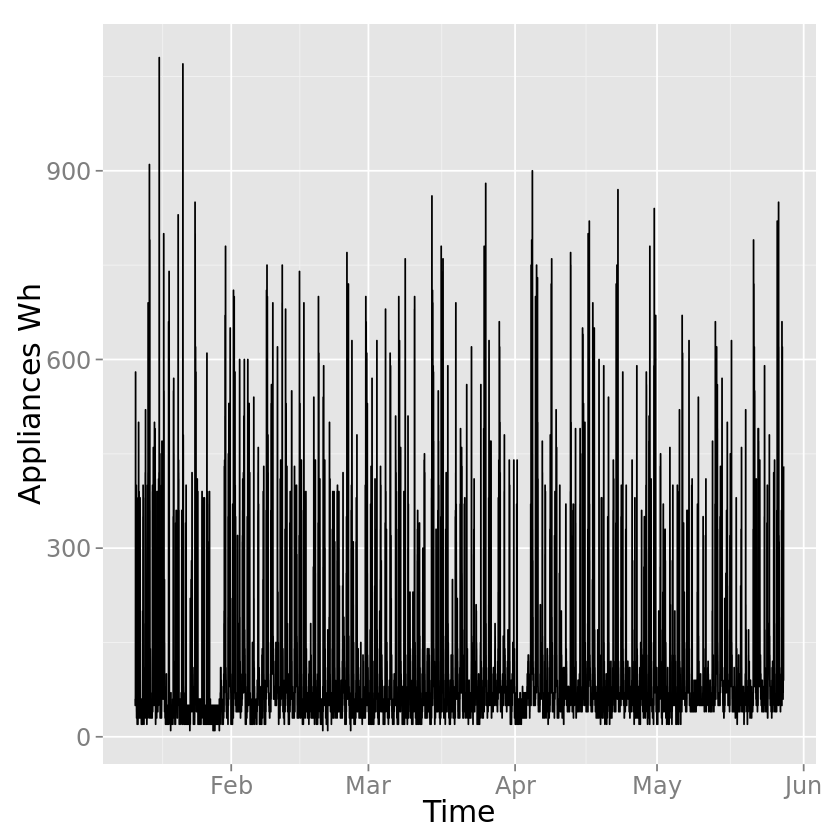

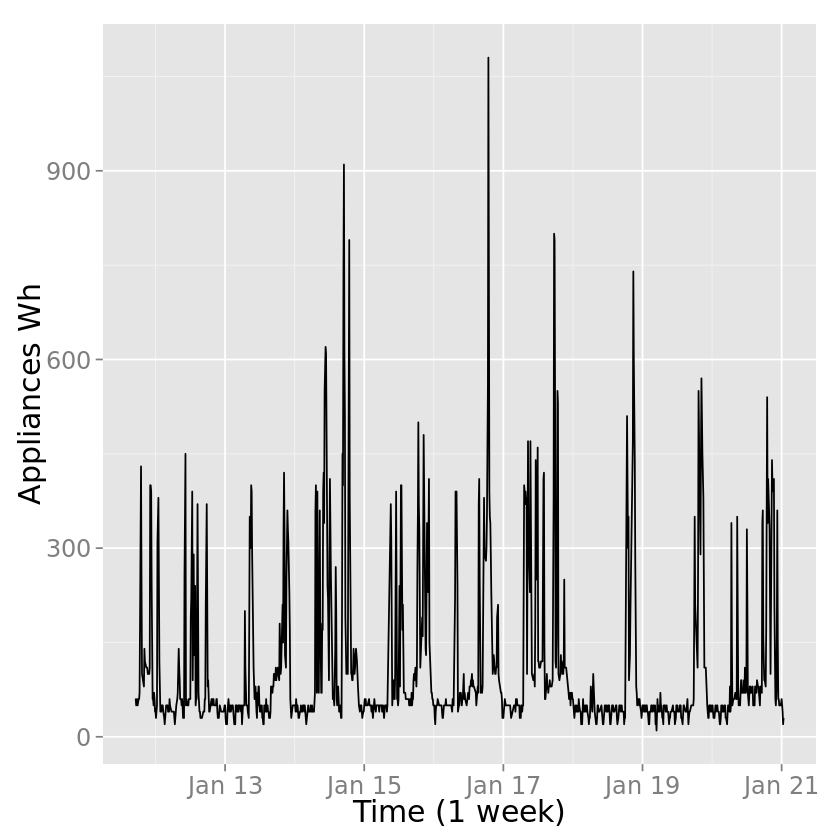

In [0]:
# Plotting the APpliances profile
#
require(gridExtra)

plot1 <-qplot(energy_data$date,energy_data$Appliances,xlab='Time',ylab='Appliances Wh',geom="line")+theme_grey(base_size = 18) 
plot1
plot2 <-qplot(energy_data$date[1:1008],energy_data$Appliances[1:1008],xlab='Time (1 week)',ylab='Appliances Wh',geom="line")+theme_grey(base_size = 18) 
plot2


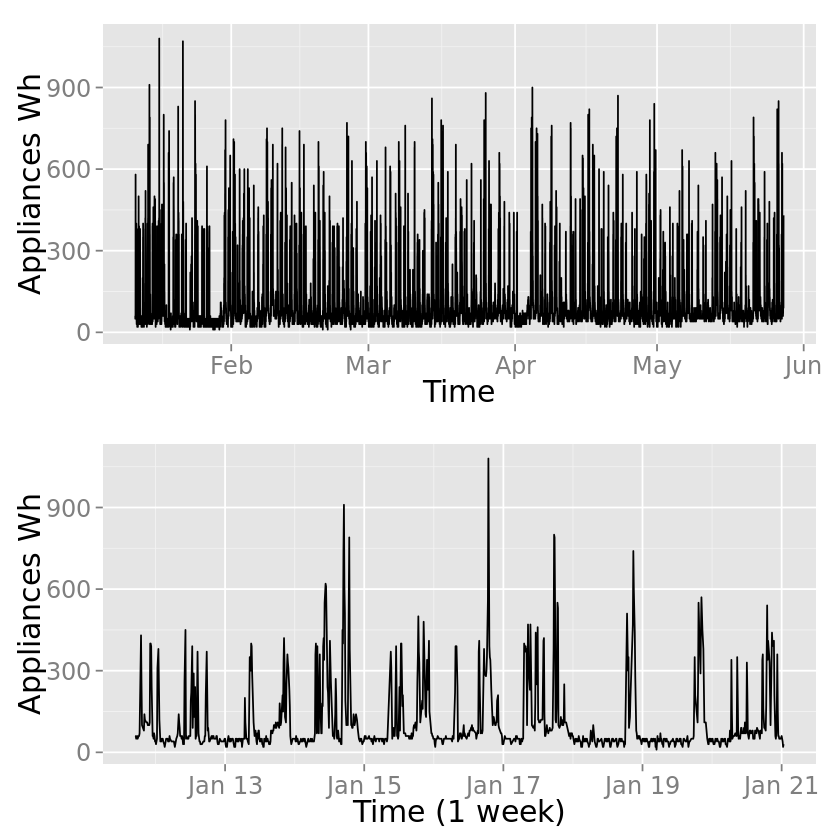

In [0]:
grid.arrange(plot1, plot2, nrow=2)


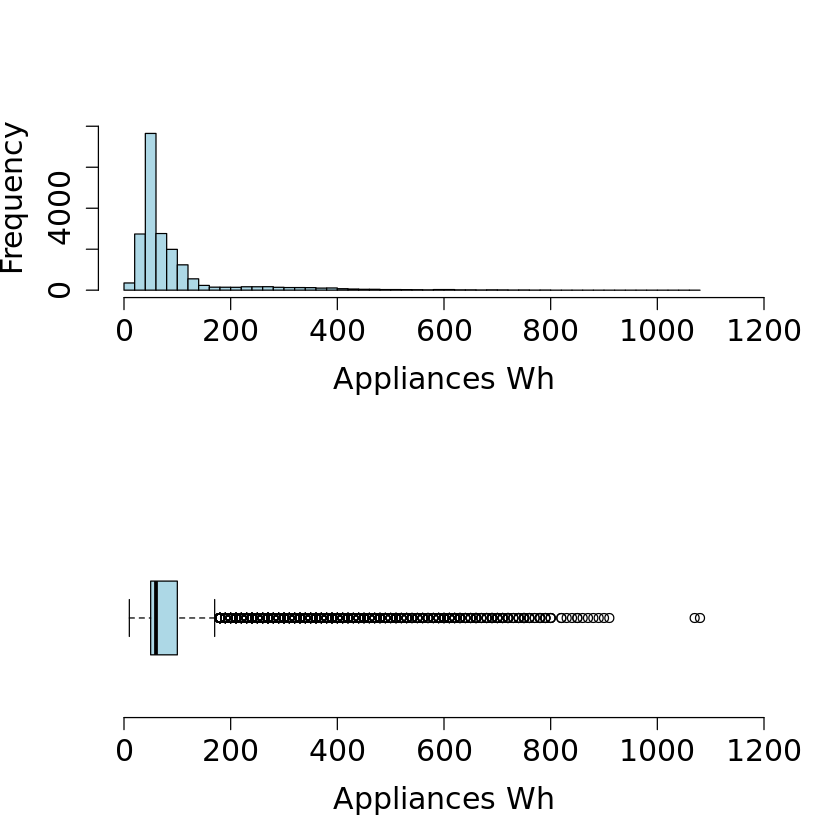

In [0]:
par(mfrow=c(2,1))
hist(energy_data$Appliances,main="",xlab = "Appliances Wh",breaks = 40,
     col='lightblue',xlim=c(0,1200),ylim=c(0,9000),cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

boxplot(energy_data$Appliances,
        boxfill = "lightblue",horizontal=TRUE,ylim=c(0,1200),xlab="Appliances Wh",frame=F,
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


In [0]:
# HEAT MAP visualization
# Visualization of the Energy use per week with heat map


energy_data$my <- floor_date(energy_data$date,"month")


energy_data$mhr <- floor_date(energy_data$date,"hour")


In [0]:
library(plyr)
energy_data_Total_per_hour <-  ddply(energy_data, "mhr", summarise,
                                     Appliances=sum(Appliances))

energy_data_Total_per_hour

energy_data_Total_per_hour$Day_week <- wday(energy_data_Total_per_hour$mhr,label=TRUE)

head(energy_data_Total_per_hour)

class(energy_data_Total_per_hour)
summary(energy_data_Total_per_hour)
energy_data_Total_per_hour_na_removed <- na.omit(energy_data_Total_per_hour)


mhr                 Appliances
1    2016-01-11 17:00:00  330      
2    2016-01-11 18:00:00 1060      
3    2016-01-11 19:00:00 1040      
4    2016-01-11 20:00:00  750      
5    2016-01-11 21:00:00  620      
6    2016-01-11 22:00:00 1600      
7    2016-01-11 23:00:00  340      
8    2016-01-12 00:00:00  850      
9    2016-01-12 01:00:00 1010      
10   2016-01-12 02:00:00  270      
11   2016-01-12 03:00:00  210      
12   2016-01-12 04:00:00  270      
13   2016-01-12 05:00:00  260      
14   2016-01-12 06:00:00  240      
15   2016-01-12 07:00:00  340      
16   2016-01-12 08:00:00  520      
17   2016-01-12 09:00:00  260      
18   2016-01-12 10:00:00 1380      
19   2016-01-12 11:00:00  330      
20   2016-01-12 12:00:00 1120      
21   2016-01-12 13:00:00  910      
22   2016-01-12 14:00:00  820      
23   2016-01-12 15:00:00  220      
24   2016-01-12 16:00:00  240      
25   2016-01-12 17:00:00 1310      
26   2016-01-12 18:00:00  350      
27   2016-01-12 19:00:00  330      
28   2016-01-12 20:00:00  310      
29   2016-01-12 21:00:00  250      
30   2016-01-12 22:00:00  280      
⋮    ⋮                   ⋮         
3261 2016-05-26 13:00:00  450      
3262 2016-05-26 14:00:00  410      
3263 2016-05-26 15:00:00  370      
3264 2016-05-26 16:00:00 2970      
3265 2016-05-26 17:00:00 2640      
3266 2016-05-26 18:00:00 1290      
3267 2016-05-26 19:00:00 1340      
3268 2016-05-26 20:00:00  550      
3269 2016-05-26 21:00:00  460      
3270 2016-05-26 22:00:00  420      
3271 2016-05-26 23:00:00  390      
3272 2016-05-27 00:00:00  360      
3273 2016-05-27 01:00:00  350      
3274 2016-05-27 02:00:00  300      
3275 2016-05-27 03:00:00  350      
3276 2016-05-27 04:00:00  350      
3277 2016-05-27 05:00:00  350      
3278 2016-05-27 06:00:00  380      
3279 2016-05-27 07:00:00  670      
3280 2016-05-27 08:00:00  780      
3281 2016-05-27 09:00:00 1510      
3282 2016-05-27 10:00:00 1510      
3283 2016-05-27 11:00:00 1860      
3284 2016-05-27 12:00:00 1110      
3285 2016-05-27 13:00:00 1590      
3286 2016-05-27 14:00:00  610      
3287 2016-05-27 15:00:00  460      
3288 2016-05-27 16:00:00  810      
3289 2016-05-27 17:00:00 1080      
3290 2016-05-27 18:00:00  430

mhr                 Appliances Day_week
1 2016-01-11 17:00:00  330       Mon     
2 2016-01-11 18:00:00 1060       Mon     
3 2016-01-11 19:00:00 1040       Mon     
4 2016-01-11 20:00:00  750       Mon     
5 2016-01-11 21:00:00  620       Mon     
6 2016-01-11 22:00:00 1600       Mon

[1] "data.frame"

      mhr                        Appliances    Day_week  
 Min.   :2016-01-11 17:00:00   Min.   : 170   Sun  :456  
 1st Qu.:2016-02-14 23:15:00   1st Qu.: 300   Mon  :463  
 Median :2016-03-20 05:30:00   Median : 380   Tues :480  
 Mean   :2016-03-20 05:30:00   Mean   : 586   Wed  :480  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 660   Thurs:480  
 Max.   :2016-05-27 18:00:00   Max.   :3650   Fri  :475  
                                              Sat  :456  

In [0]:
dim(energy_data_Total_per_hour)
names(energy_data_Total_per_hour)
dim(energy_data_Total_per_hour_na_removed)
names(energy_data_Total_per_hour_na_removed)
summary(energy_data_Total_per_hour_na_removed)




[1] 3290    3

[1] "mhr"        "Appliances" "Day_week"

[1] 3290    3

[1] "mhr"        "Appliances" "Day_week"

      mhr                        Appliances    Day_week  
 Min.   :2016-01-11 17:00:00   Min.   : 170   Sun  :456  
 1st Qu.:2016-02-14 23:15:00   1st Qu.: 300   Mon  :463  
 Median :2016-03-20 05:30:00   Median : 380   Tues :480  
 Mean   :2016-03-20 05:30:00   Mean   : 586   Wed  :480  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 660   Thurs:480  
 Max.   :2016-05-27 18:00:00   Max.   :3650   Fri  :475  
                                              Sat  :456  

In [0]:
# getting now the week of the year
energy_data_Total_per_hour_na_removed$week_year <- week(energy_data_Total_per_hour_na_removed$mhr)
head(energy_data_Total_per_hour_na_removed)

unique(energy_data_Total_per_hour_na_removed$week_year)


mhr                 Appliances Day_week week_year
1 2016-01-11 17:00:00  330       Mon      2        
2 2016-01-11 18:00:00 1060       Mon      2        
3 2016-01-11 19:00:00 1040       Mon      2        
4 2016-01-11 20:00:00  750       Mon      2        
5 2016-01-11 21:00:00  620       Mon      2        
6 2016-01-11 22:00:00 1600       Mon      2

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

In [0]:
# first week only

energy_data_Total_per_hour_na_removed_w1 <- energy_data_Total_per_hour_na_removed[energy_data_Total_per_hour_na_removed$week_year ==3,]

energy_data_Total_per_hour_na_removed_w1

energy_data_Total_per_hour_na_removed_w1$Hour <- hour(energy_data_Total_per_hour_na_removed_w1$mhr)


names(energy_data_Total_per_hour_na_removed_w1)


mhr                 Appliances Day_week week_year
80  2016-01-15 00:00:00  320       Fri      3        
81  2016-01-15 01:00:00  310       Fri      3        
82  2016-01-15 02:00:00  280       Fri      3        
83  2016-01-15 03:00:00  260       Fri      3        
84  2016-01-15 04:00:00  300       Fri      3        
85  2016-01-15 05:00:00  300       Fri      3        
86  2016-01-15 06:00:00  270       Fri      3        
87  2016-01-15 07:00:00  310       Fri      3        
88  2016-01-15 08:00:00 1410       Fri      3        
89  2016-01-15 09:00:00 1240       Fri      3        
90  2016-01-15 10:00:00  750       Fri      3        
91  2016-01-15 11:00:00  750       Fri      3        
92  2016-01-15 12:00:00 1260       Fri      3        
93  2016-01-15 13:00:00 1180       Fri      3        
94  2016-01-15 14:00:00  380       Fri      3        
95  2016-01-15 15:00:00  340       Fri      3        
96  2016-01-15 16:00:00  340       Fri      3        
97  2016-01-15 17:00:00  590       Fri      3        
98  2016-01-15 18:00:00 1670       Fri      3        
99  2016-01-15 19:00:00 1320       Fri      3        
100 2016-01-15 20:00:00 1400       Fri      3        
101 2016-01-15 21:00:00 1380       Fri      3        
102 2016-01-15 22:00:00 1310       Fri      3        
103 2016-01-15 23:00:00  380       Fri      3        
104 2016-01-16 00:00:00  240       Sat      3        
105 2016-01-16 01:00:00  320       Sat      3        
106 2016-01-16 02:00:00  280       Sat      3        
107 2016-01-16 03:00:00  250       Sat      3        
108 2016-01-16 04:00:00  300       Sat      3        
109 2016-01-16 05:00:00  240       Sat      3        
⋮   ⋮                   ⋮          ⋮        ⋮        
218 2016-01-20 18:00:00 1350       Wed      3        
219 2016-01-20 19:00:00 2370       Wed      3        
220 2016-01-20 20:00:00 1700       Wed      3        
221 2016-01-20 21:00:00 1560       Wed      3        
222 2016-01-20 22:00:00  850       Wed      3        
223 2016-01-20 23:00:00  310       Wed      3        
224 2016-01-21 00:00:00  250       Thurs    3        
225 2016-01-21 01:00:00  330       Thurs    3        
226 2016-01-21 02:00:00  250       Thurs    3        
227 2016-01-21 03:00:00  300       Thurs    3        
228 2016-01-21 04:00:00  240       Thurs    3        
229 2016-01-21 05:00:00  310       Thurs    3        
230 2016-01-21 06:00:00  270       Thurs    3        
231 2016-01-21 07:00:00  280       Thurs    3        
232 2016-01-21 08:00:00  190       Thurs    3        
233 2016-01-21 09:00:00  320       Thurs    3        
234 2016-01-21 10:00:00  330       Thurs    3        
235 2016-01-21 11:00:00  310       Thurs    3        
236 2016-01-21 12:00:00  320       Thurs    3        
237 2016-01-21 13:00:00 1040       Thurs    3        
238 2016-01-21 14:00:00  380       Thurs    3        
239 2016-01-21 15:00:00  270       Thurs    3        
240 2016-01-21 16:00:00  250       Thurs    3        
241 2016-01-21 17:00:00  210       Thurs    3        
242 2016-01-21 18:00:00 1970       Thurs    3        
243 2016-01-21 19:00:00 1950       Thurs    3        
244 2016-01-21 20:00:00 1700       Thurs    3        
245 2016-01-21 21:00:00 1280       Thurs    3        
246 2016-01-21 22:00:00  330       Thurs    3        
247 2016-01-21 23:00:00  260       Thurs    3

[1] "mhr"        "Appliances" "Day_week"   "week_year"  "Hour"

[1] 190

[1] 3350

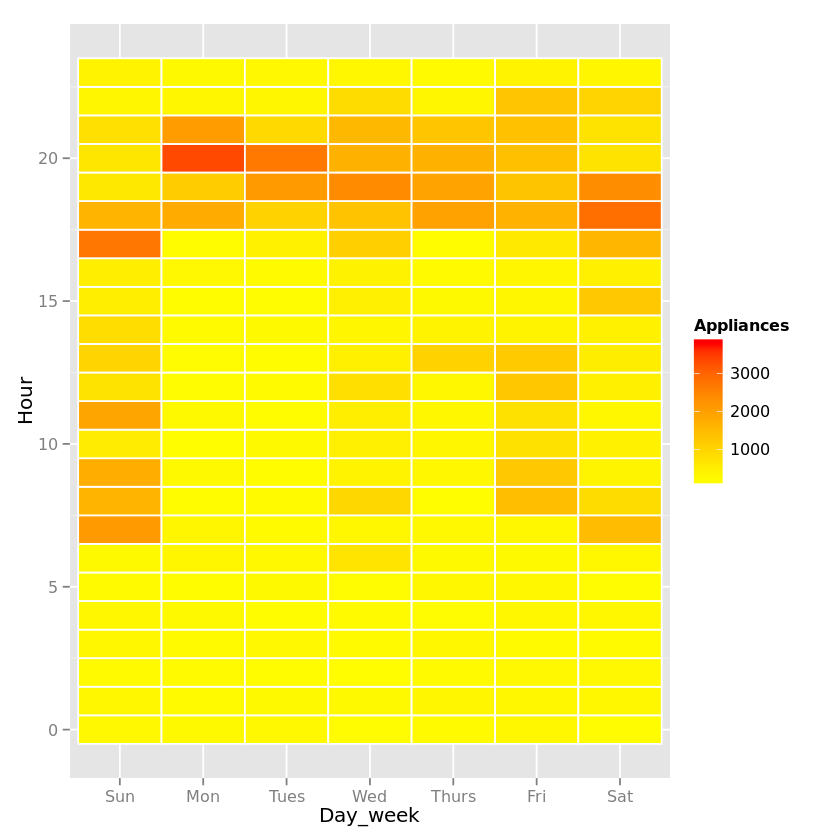

In [0]:
library(ggplot2)
library(lubridate)
# "mhr"        "Appliances" "Day_week"   "week_year" "Hour" 
gg1 <-ggplot(energy_data_Total_per_hour_na_removed_w1,aes(x=Day_week,y=Hour,
                                                          fill=Appliances)) 

gg1

min(energy_data_Total_per_hour_na_removed_w1$Appliances)
# 190
max(energy_data_Total_per_hour_na_removed_w1$Appliances)

gg1 <- gg1 + geom_tile(color="white", size=0.50)+ scale_fill_gradient(low="yellow", high="red",limit=c(150,3800))
gg1

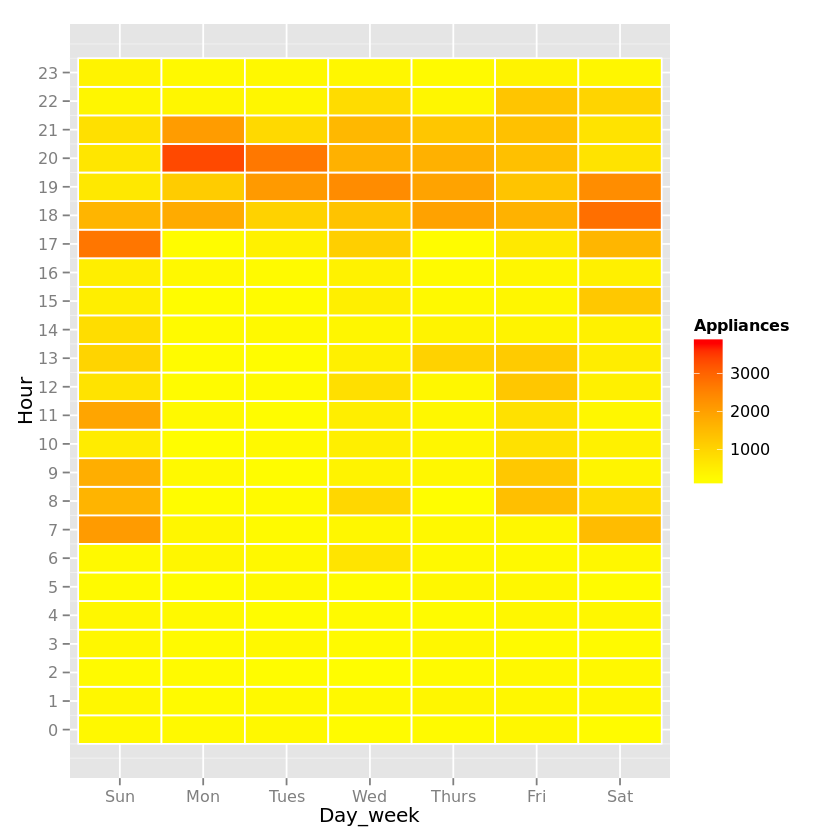

In [0]:
#library(viridis)
#library(ggthemes)
#gg1 <- gg1 +scale_fill_viridis(name="Appliances energy",option="A")
#gg <- gg +scale_y_continuous(breaks=seq(0,23,1),trans="reverse")
gg1 <- gg1 +scale_y_continuous(breaks=seq(0,23,1)) 

gg1

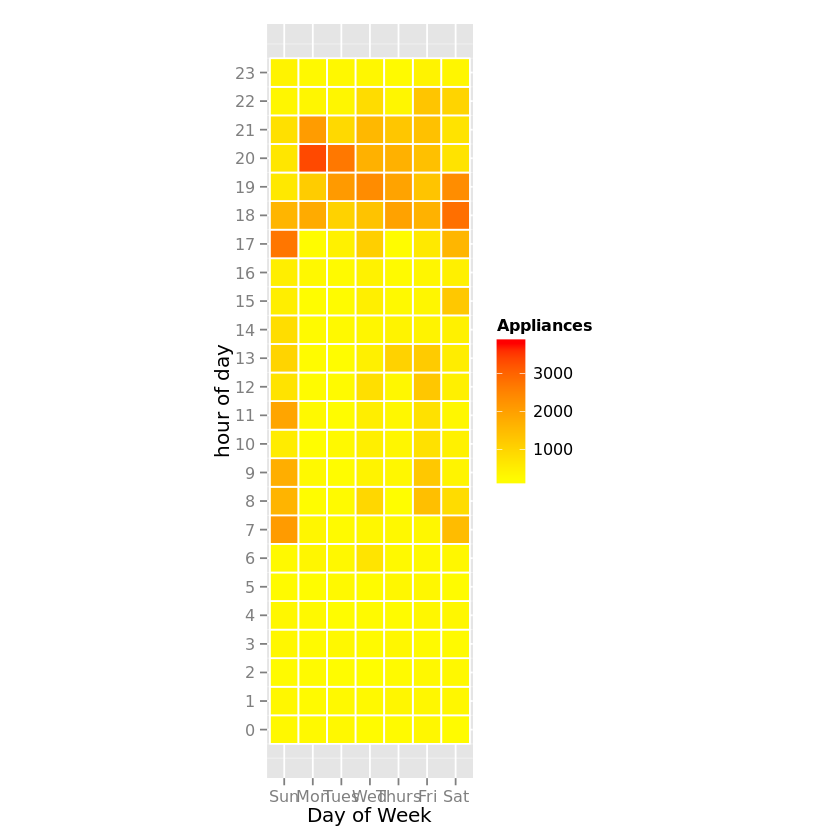

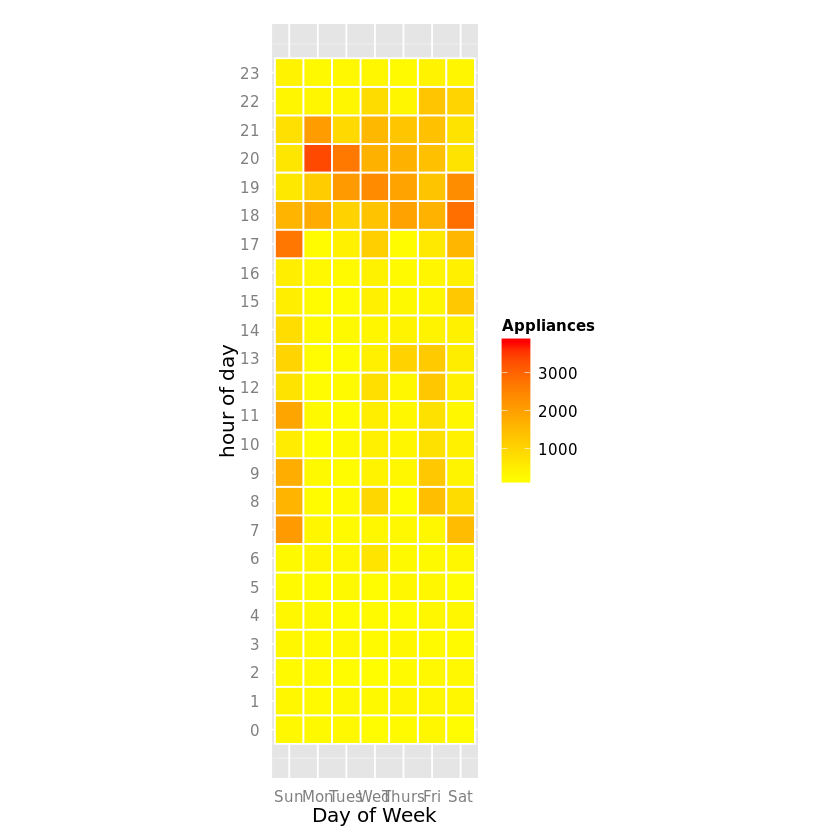

In [0]:
gg1 <- gg1 + coord_equal()
gg1
gg1 <- gg1 + labs(x="Day of Week", y="hour of day")#, title="Appliances energy consumption")
#gg1 <- gg1 + theme_tufte(base_family="Helvetica")
gg1 <- gg1 + theme(plot.title=element_text(hjust=0))
gg1 <- gg1 + theme(axis.ticks=element_blank())
gg1 <- gg1 + theme(axis.text=element_text(size=9))
gg1 <- gg1 + theme(legend.title=element_text(size=9))
gg1 <- gg1 + theme(legend.text=element_text(size=9))
gg1


In [0]:
Total_per_hour_na_removed_w2 <- energy_data_Total_per_hour_na_removed[energy_data_Total_per_hour_na_removed$week_year ==4,]

Total_per_hour_na_removed_w2

Total_per_hour_na_removed_w2$Hour <- hour(Total_per_hour_na_removed_w2$mhr)


mhr                 Appliances Day_week week_year
248 2016-01-22 00:00:00 240        Fri      4        
249 2016-01-22 01:00:00 220        Fri      4        
250 2016-01-22 02:00:00 230        Fri      4        
251 2016-01-22 03:00:00 240        Fri      4        
252 2016-01-22 04:00:00 220        Fri      4        
253 2016-01-22 05:00:00 230        Fri      4        
254 2016-01-22 06:00:00 230        Fri      4        
255 2016-01-22 07:00:00 270        Fri      4        
256 2016-01-22 08:00:00 300        Fri      4        
257 2016-01-22 09:00:00 620        Fri      4        
258 2016-01-22 10:00:00 260        Fri      4        
259 2016-01-22 11:00:00 940        Fri      4        
260 2016-01-22 12:00:00 190        Fri      4        
261 2016-01-22 13:00:00 270        Fri      4        
262 2016-01-22 14:00:00 170        Fri      4        
263 2016-01-22 15:00:00 260        Fri      4        
264 2016-01-22 16:00:00 190        Fri      4        
265 2016-01-22 17:00:00 260        Fri      4        
266 2016-01-22 18:00:00 170        Fri      4        
267 2016-01-22 19:00:00 230        Fri      4        
268 2016-01-22 20:00:00 220        Fri      4        
269 2016-01-22 21:00:00 200        Fri      4        
270 2016-01-22 22:00:00 230        Fri      4        
271 2016-01-22 23:00:00 190        Fri      4        
272 2016-01-23 00:00:00 260        Sat      4        
273 2016-01-23 01:00:00 190        Sat      4        
274 2016-01-23 02:00:00 210        Sat      4        
275 2016-01-23 03:00:00 230        Sat      4        
276 2016-01-23 04:00:00 180        Sat      4        
277 2016-01-23 05:00:00 260        Sat      4        
⋮   ⋮                   ⋮          ⋮        ⋮        
386 2016-01-27 18:00:00 240        Wed      4        
387 2016-01-27 19:00:00 240        Wed      4        
388 2016-01-27 20:00:00 180        Wed      4        
389 2016-01-27 21:00:00 250        Wed      4        
390 2016-01-27 22:00:00 230        Wed      4        
391 2016-01-27 23:00:00 200        Wed      4        
392 2016-01-28 00:00:00 260        Thurs    4        
393 2016-01-28 01:00:00 180        Thurs    4        
394 2016-01-28 02:00:00 250        Thurs    4        
395 2016-01-28 03:00:00 250        Thurs    4        
396 2016-01-28 04:00:00 200        Thurs    4        
397 2016-01-28 05:00:00 250        Thurs    4        
398 2016-01-28 06:00:00 180        Thurs    4        
399 2016-01-28 07:00:00 240        Thurs    4        
400 2016-01-28 08:00:00 190        Thurs    4        
401 2016-01-28 09:00:00 260        Thurs    4        
402 2016-01-28 10:00:00 190        Thurs    4        
403 2016-01-28 11:00:00 250        Thurs    4        
404 2016-01-28 12:00:00 250        Thurs    4        
405 2016-01-28 13:00:00 200        Thurs    4        
406 2016-01-28 14:00:00 260        Thurs    4        
407 2016-01-28 15:00:00 170        Thurs    4        
408 2016-01-28 16:00:00 260        Thurs    4        
409 2016-01-28 17:00:00 250        Thurs    4        
410 2016-01-28 18:00:00 200        Thurs    4        
411 2016-01-28 19:00:00 240        Thurs    4        
412 2016-01-28 20:00:00 200        Thurs    4        
413 2016-01-28 21:00:00 250        Thurs    4        
414 2016-01-28 22:00:00 170        Thurs    4        
415 2016-01-28 23:00:00 250        Thurs    4

In [0]:
names(Total_per_hour_na_removed_w2)

gg2 <-ggplot(Total_per_hour_na_removed_w2,aes(x=Day_week,y=Hour,fill=Appliances))

min(Total_per_hour_na_removed_w2$Appliances)

max(Total_per_hour_na_removed_w2$Appliances)


[1] "mhr"        "Appliances" "Day_week"   "week_year"  "Hour"

[1] 170

[1] 3650

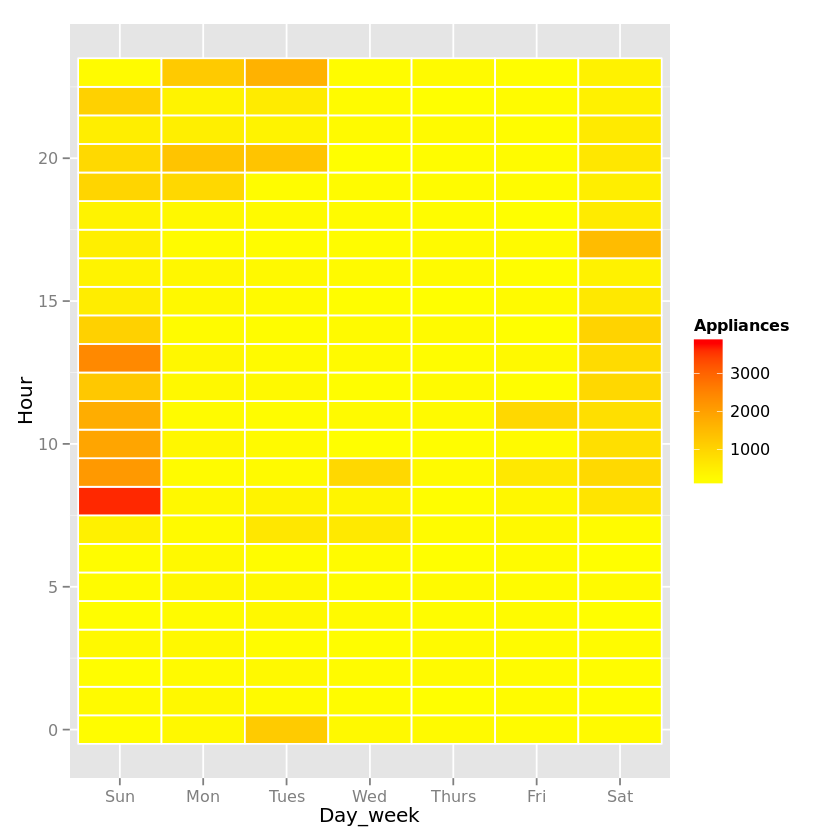

In [0]:
gg2 <- gg2 + geom_tile(color="white", size=0.50) + scale_fill_gradient(low="yellow", high="red",limit=c(150,3800))
gg2


Scale for 'y' is already present. Adding another scale for 'y', which will replace the existing scale.


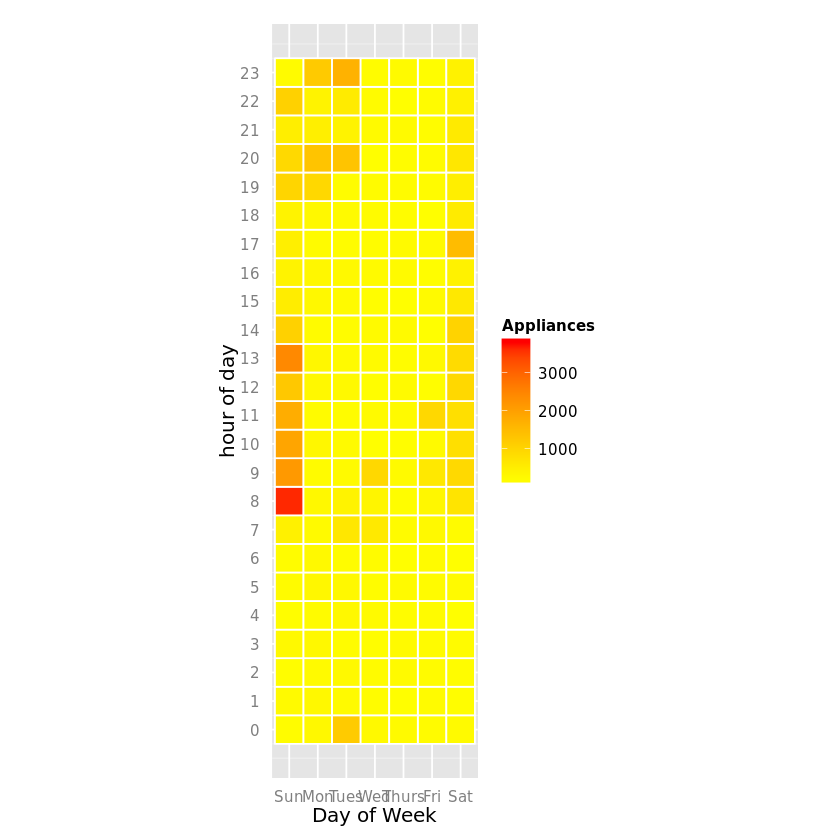

In [0]:
gg2 <- gg2 +scale_y_continuous(breaks=seq(0,23,1))
gg2 <- gg2 + coord_equal()

gg2 <- gg2 + labs(x="Day of Week", y="hour of day")#, title="Appliances energy consumption")
#gg2 <- gg2 + theme_tufte(base_family="Helvetica")
gg2 <- gg2 + theme(plot.title=element_text(hjust=0))
gg2 <- gg2 + theme(axis.ticks=element_blank())
gg2 <- gg2 + theme(axis.text=element_text(size=9))
gg2 <- gg2 + theme(legend.title=element_text(size=9))
gg2 <- gg2 + theme(legend.text=element_text(size=9))
gg2


In [0]:
Total_per_hour_na_removed_w3 <- energy_data_Total_per_hour_na_removed[energy_data_Total_per_hour_na_removed$week_year ==5,]

Total_per_hour_na_removed_w3

Total_per_hour_na_removed_w3$Hour <- hour(Total_per_hour_na_removed_w3$mhr)


names(Total_per_hour_na_removed_w3)

gg3 <-ggplot(Total_per_hour_na_removed_w3,aes(x=Day_week,y=Hour,fill=Appliances))

min(Total_per_hour_na_removed_w3$Appliances)
max(Total_per_hour_na_removed_w3$Appliances)


mhr                 Appliances Day_week week_year
416 2016-01-29 00:00:00 200        Fri      5        
417 2016-01-29 01:00:00 260        Fri      5        
418 2016-01-29 02:00:00 250        Fri      5        
419 2016-01-29 03:00:00 180        Fri      5        
420 2016-01-29 04:00:00 240        Fri      5        
421 2016-01-29 05:00:00 200        Fri      5        
422 2016-01-29 06:00:00 260        Fri      5        
423 2016-01-29 07:00:00 170        Fri      5        
424 2016-01-29 08:00:00 250        Fri      5        
425 2016-01-29 09:00:00 190        Fri      5        
426 2016-01-29 10:00:00 250        Fri      5        
427 2016-01-29 11:00:00 180        Fri      5        
428 2016-01-29 12:00:00 250        Fri      5        
429 2016-01-29 13:00:00 180        Fri      5        
430 2016-01-29 14:00:00 270        Fri      5        
431 2016-01-29 15:00:00 170        Fri      5        
432 2016-01-29 16:00:00 280        Fri      5        
433 2016-01-29 17:00:00 390        Fri      5        
434 2016-01-29 18:00:00 510        Fri      5        
435 2016-01-29 19:00:00 530        Fri      5        
436 2016-01-29 20:00:00 460        Fri      5        
437 2016-01-29 21:00:00 480        Fri      5        
438 2016-01-29 22:00:00 420        Fri      5        
439 2016-01-29 23:00:00 350        Fri      5        
440 2016-01-30 00:00:00 260        Sat      5        
441 2016-01-30 01:00:00 200        Sat      5        
442 2016-01-30 02:00:00 270        Sat      5        
443 2016-01-30 03:00:00 220        Sat      5        
444 2016-01-30 04:00:00 210        Sat      5        
445 2016-01-30 05:00:00 250        Sat      5        
⋮   ⋮                   ⋮          ⋮        ⋮        
554 2016-02-03 18:00:00 1680       Wed      5        
555 2016-02-03 19:00:00  790       Wed      5        
556 2016-02-03 20:00:00  790       Wed      5        
557 2016-02-03 21:00:00  710       Wed      5        
558 2016-02-03 22:00:00  510       Wed      5        
559 2016-02-03 23:00:00  390       Wed      5        
560 2016-02-04 00:00:00  230       Thurs    5        
561 2016-02-04 01:00:00  270       Thurs    5        
562 2016-02-04 02:00:00  280       Thurs    5        
563 2016-02-04 03:00:00  190       Thurs    5        
564 2016-02-04 04:00:00  280       Thurs    5        
565 2016-02-04 05:00:00  280       Thurs    5        
566 2016-02-04 06:00:00  230       Thurs    5        
567 2016-02-04 07:00:00  300       Thurs    5        
568 2016-02-04 08:00:00  370       Thurs    5        
569 2016-02-04 09:00:00  850       Thurs    5        
570 2016-02-04 10:00:00  320       Thurs    5        
571 2016-02-04 11:00:00  420       Thurs    5        
572 2016-02-04 12:00:00 2120       Thurs    5        
573 2016-02-04 13:00:00  830       Thurs    5        
574 2016-02-04 14:00:00  620       Thurs    5        
575 2016-02-04 15:00:00  420       Thurs    5        
576 2016-02-04 16:00:00  600       Thurs    5        
577 2016-02-04 17:00:00  630       Thurs    5        
578 2016-02-04 18:00:00 1670       Thurs    5        
579 2016-02-04 19:00:00 1020       Thurs    5        
580 2016-02-04 20:00:00  600       Thurs    5        
581 2016-02-04 21:00:00 1190       Thurs    5        
582 2016-02-04 22:00:00  390       Thurs    5        
583 2016-02-04 23:00:00  340       Thurs    5

[1] "mhr"        "Appliances" "Day_week"   "week_year"  "Hour"

[1] 170

[1] 3420

In [0]:
gg3 <- gg3 + geom_tile(color="white", size=0.50) + scale_fill_gradient(low="yellow", high="red",limit=c(150,3800))

library(viridis)
library(ggthemes)

ERROR: Error in library(viridis): there is no package called ‘viridis’


In [0]:
gg3 <- gg3 +scale_y_continuous(breaks=seq(0,23,1))
gg3 <- gg3 + coord_equal()


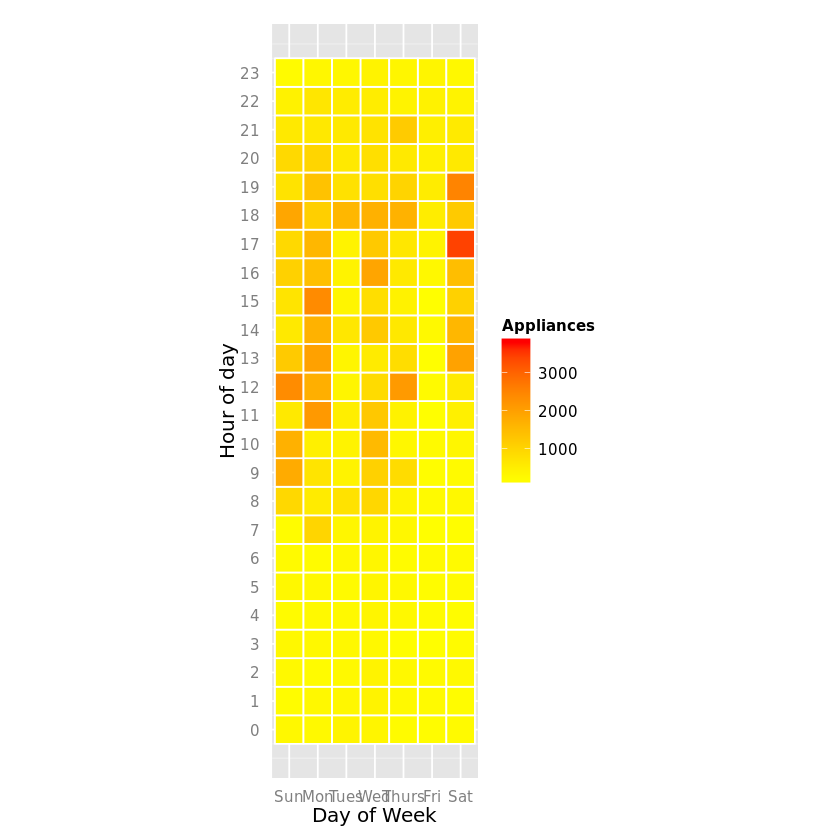

In [0]:
gg3 <- gg3 + labs(x="Day of Week", y="Hour of day")#, title="Appliances energy consumption")
#gg3 <- gg3 + theme_tufte(base_family="Helvetica")
gg3 <- gg3 + theme(plot.title=element_text(hjust=0))
gg3 <- gg3 + theme(axis.ticks=element_blank())
gg3 <- gg3 + theme(axis.text=element_text(size=9))
gg3 <- gg3 + theme(legend.title=element_text(size=9))
gg3 <- gg3 + theme(legend.text=element_text(size=9))
gg3


In [0]:
Total_per_hour_na_removed_w4 <- energy_data_Total_per_hour_na_removed[energy_data_Total_per_hour_na_removed$week_year ==6,]

Total_per_hour_na_removed_w4

Total_per_hour_na_removed_w4$Hour <- hour(Total_per_hour_na_removed_w4$mhr)


names(Total_per_hour_na_removed_w4)

gg4 <-ggplot(Total_per_hour_na_removed_w4,aes(x=Day_week,y=Hour,fill=Appliances))
min(Total_per_hour_na_removed_w4$Appliances)


mhr                 Appliances Day_week week_year
584 2016-02-05 00:00:00  220       Fri      6        
585 2016-02-05 01:00:00  260       Fri      6        
586 2016-02-05 02:00:00  290       Fri      6        
587 2016-02-05 03:00:00  260       Fri      6        
588 2016-02-05 04:00:00  210       Fri      6        
589 2016-02-05 05:00:00  280       Fri      6        
590 2016-02-05 06:00:00  270       Fri      6        
591 2016-02-05 07:00:00  240       Fri      6        
592 2016-02-05 08:00:00  310       Fri      6        
593 2016-02-05 09:00:00  290       Fri      6        
594 2016-02-05 10:00:00  220       Fri      6        
595 2016-02-05 11:00:00  420       Fri      6        
596 2016-02-05 12:00:00  420       Fri      6        
597 2016-02-05 13:00:00  320       Fri      6        
598 2016-02-05 14:00:00  220       Fri      6        
599 2016-02-05 15:00:00  310       Fri      6        
600 2016-02-05 16:00:00  310       Fri      6        
601 2016-02-05 17:00:00  410       Fri      6        
602 2016-02-05 18:00:00 1430       Fri      6        
603 2016-02-05 19:00:00  790       Fri      6        
604 2016-02-05 20:00:00  550       Fri      6        
605 2016-02-05 21:00:00  450       Fri      6        
606 2016-02-05 22:00:00  340       Fri      6        
607 2016-02-05 23:00:00  190       Fri      6        
608 2016-02-06 00:00:00  290       Sat      6        
609 2016-02-06 01:00:00  280       Sat      6        
610 2016-02-06 02:00:00  270       Sat      6        
611 2016-02-06 03:00:00  270       Sat      6        
612 2016-02-06 04:00:00  220       Sat      6        
613 2016-02-06 05:00:00  280       Sat      6        
⋮   ⋮                   ⋮          ⋮        ⋮        
722 2016-02-10 18:00:00 1950       Wed      6        
723 2016-02-10 19:00:00  670       Wed      6        
724 2016-02-10 20:00:00  900       Wed      6        
725 2016-02-10 21:00:00  750       Wed      6        
726 2016-02-10 22:00:00  640       Wed      6        
727 2016-02-10 23:00:00  430       Wed      6        
728 2016-02-11 00:00:00  270       Thurs    6        
729 2016-02-11 01:00:00  320       Thurs    6        
730 2016-02-11 02:00:00  320       Thurs    6        
731 2016-02-11 03:00:00  260       Thurs    6        
732 2016-02-11 04:00:00  280       Thurs    6        
733 2016-02-11 05:00:00  300       Thurs    6        
734 2016-02-11 06:00:00  280       Thurs    6        
735 2016-02-11 07:00:00  270       Thurs    6        
736 2016-02-11 08:00:00  710       Thurs    6        
737 2016-02-11 09:00:00  440       Thurs    6        
738 2016-02-11 10:00:00  610       Thurs    6        
739 2016-02-11 11:00:00 1020       Thurs    6        
740 2016-02-11 12:00:00  730       Thurs    6        
741 2016-02-11 13:00:00  500       Thurs    6        
742 2016-02-11 14:00:00  640       Thurs    6        
743 2016-02-11 15:00:00  860       Thurs    6        
744 2016-02-11 16:00:00  650       Thurs    6        
745 2016-02-11 17:00:00  940       Thurs    6        
746 2016-02-11 18:00:00 2740       Thurs    6        
747 2016-02-11 19:00:00  760       Thurs    6        
748 2016-02-11 20:00:00  750       Thurs    6        
749 2016-02-11 21:00:00  790       Thurs    6        
750 2016-02-11 22:00:00  510       Thurs    6        
751 2016-02-11 23:00:00  350       Thurs    6

[1] "mhr"        "Appliances" "Day_week"   "week_year"  "Hour"

[1] 180

In [0]:
max(Total_per_hour_na_removed_w4$Appliances)


[1] 2740

In [0]:
gg4 <- gg4 + geom_tile(color="white", size=0.50) + scale_fill_gradient(low="yellow", high="red",limit=c(150,3800))



In [0]:
gg4 <- gg4 +scale_y_continuous(breaks=seq(0,23,1))
gg4 <- gg4 + coord_equal()


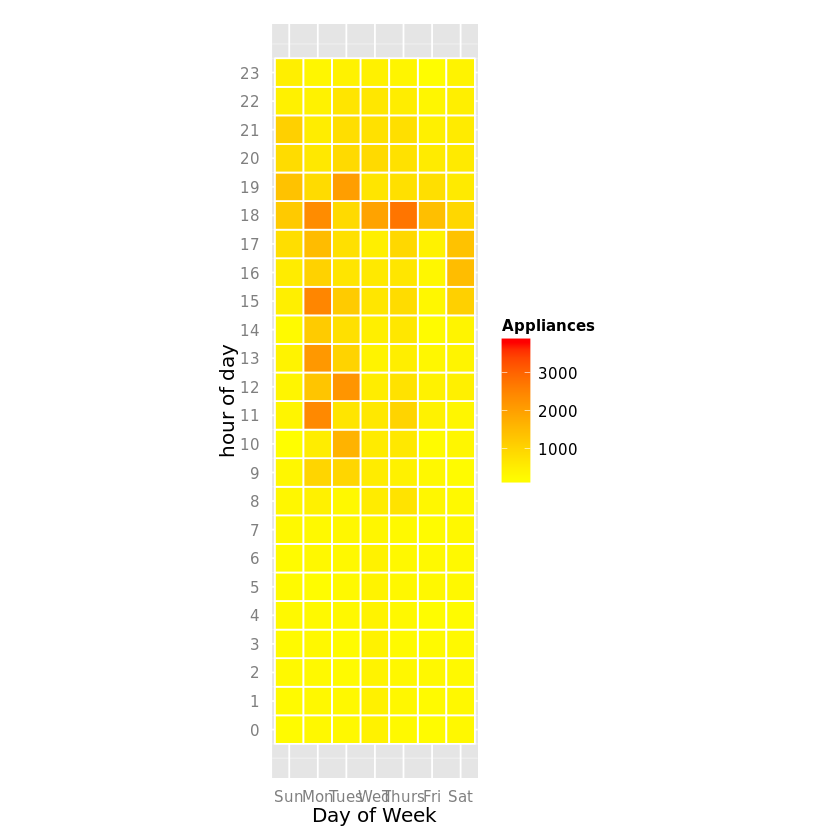

In [0]:
gg4 <- gg4 + labs(x="Day of Week", y="hour of day")#, title="Appliances energy consumption")
#gg4 <- gg4 + theme_tufte(base_family="Helvetica")
gg4 <- gg4 + theme(plot.title=element_text(hjust=0))
gg4 <- gg4 + theme(axis.ticks=element_blank())
gg4 <- gg4 + theme(axis.text=element_text(size=9))
gg4 <- gg4 + theme(legend.title=element_text(size=9))
gg4 <- gg4 + theme(legend.text=element_text(size=9))
#gg4 <- gg4 +  theme(plot.margin=unit(c(0,0,0,0), "cm"))
gg4

TableGrob (1 x 4) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]
4 4 (1-1,4-4) arrange gtable[layout]

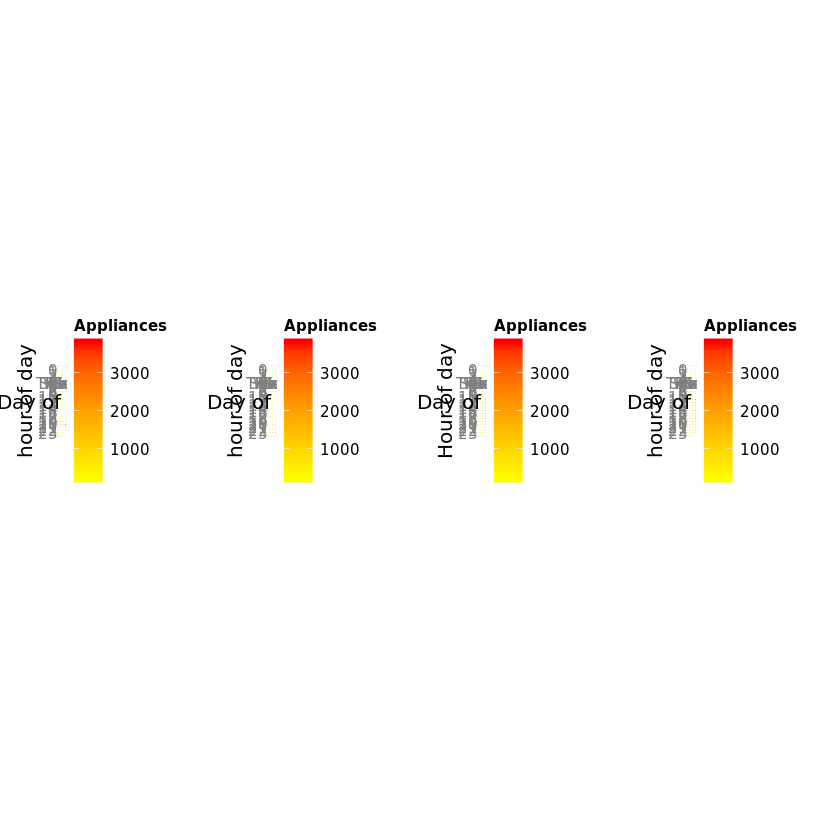

In [0]:
require(gridExtra)
g <- grid.arrange(gg1, gg2,gg3, gg4,ncol=4)
g


In [0]:
energy_data$my <- NULL
energy_data$mhr <- NULL
names(energy_data)



[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

In [0]:
library(caret)
set.seed(12345)
train_index <- createDataPartition(energy_data$Appliances,p=0.75,list=FALSE)

train_data <- energy_data[train_index,]
dim(train_data)
names(train_data)



Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster



[1] 14803    32

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

In [0]:
write.table(format(train_data, digits=19),file = "training.csv", sep = ",", row.names=FALSE)


In [0]:
# checkin if the two training (objects) files are the same afer saving

train_data2 <- read.csv("training.csv")


In [0]:
train_data2$date <- strptime(as.character(train_data2$date),format="%Y-%m-%d %H:%M:%S")
train_data2$date <- as.POSIXct(train_data2$date,tz = "UTC")
class(train_data2$date)
str(train_data2)


[1] "POSIXct" "POSIXt"

'data.frame':	14803 obs. of  32 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 60 60 60 70 430 90 80 140 ...
 $ lights     : int  30 30 40 50 40 40 50 10 30 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.8 ...
 $ RH_1       : num  47.6 46.7 46.3 45.6 45.6 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.5 44.5 44.4 ...
 $ T3         : num  19.8 19.8 19.8 19.7 19.7 ...
 $ RH_3       : num  44.7 44.8 45 44.9 44.8 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.5 45.9 45.8 ...
 $ T5         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 54.9 55 ...
 $ T6         : num  7.03 6.83 6.37 6.19 6.12 ...
 $ RH_6       : num  84.3 84.1 84.9 86.4 87.2 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.2 41.2 41.4 ...
 $ T8         : num  18.2 18.2 18.1 18.1 18.1 ...
 $ RH_8       : num  48.

In [0]:
train_data <-train_data2


In [0]:
test_data <- energy_data[-train_index,]
dim(test_data)


[1] 4932   32

In [0]:
write.table(format(test_data, digits=19),file = "testing.csv", sep = ",", row.names=FALSE)

testing2 <- read.csv("testing.csv")

testing2$date <- strptime(as.character(testing2$date),format="%Y-%m-%d %H:%M:%S")
testing2$date <- as.POSIXct(testing2$date,tz = "UTC")



In [0]:
all(testing2==test_data)


[1] TRUE

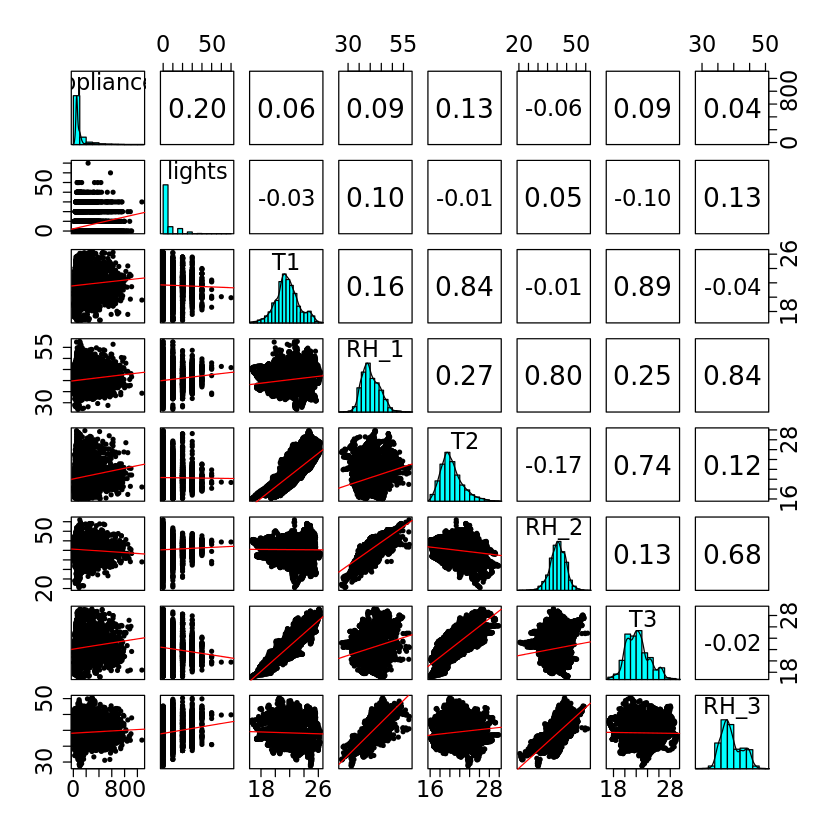

In [0]:
pairs.panels(train_data[,c(2, 3, 4, 5, 6, 7, 8, 9)],lm=TRUE,
             ellipses = FALSE,rug=FALSE,scale=FALSE,
             cex.cor=1.1,cex.labels=1.7, cex.axis=1.7)


In [0]:
library(Hmisc)
rcorr(as.matrix(train_data[,c(2, 3, 4, 5, 6, 7, 8, 9)]))



ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


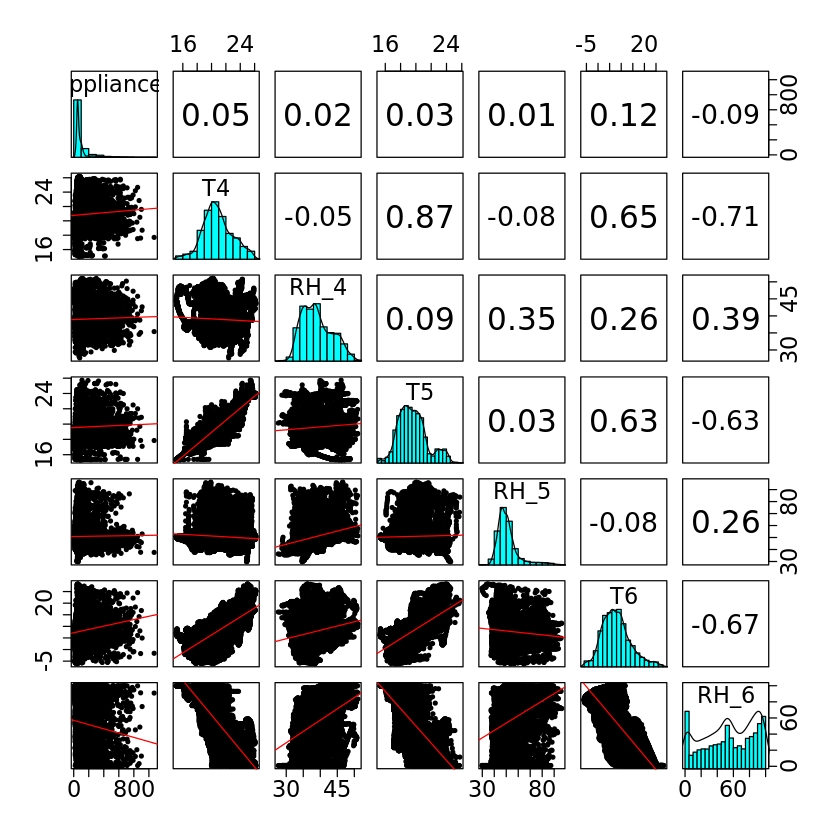

In [0]:
pairs.panels(train_data[,c(2,10,11,12,13,14,15)],lm=TRUE,ellipses = FALSE,rug=FALSE,scale=FALSE,
             cex.cor=1.1,cex.labels=1.7, cex.axis=1.7)


In [0]:
rcorr(as.matrix(train_data[,c(2,10,11,12,13,14,15)]))


ERROR: Error in eval(expr, envir, enclos): could not find function "rcorr"


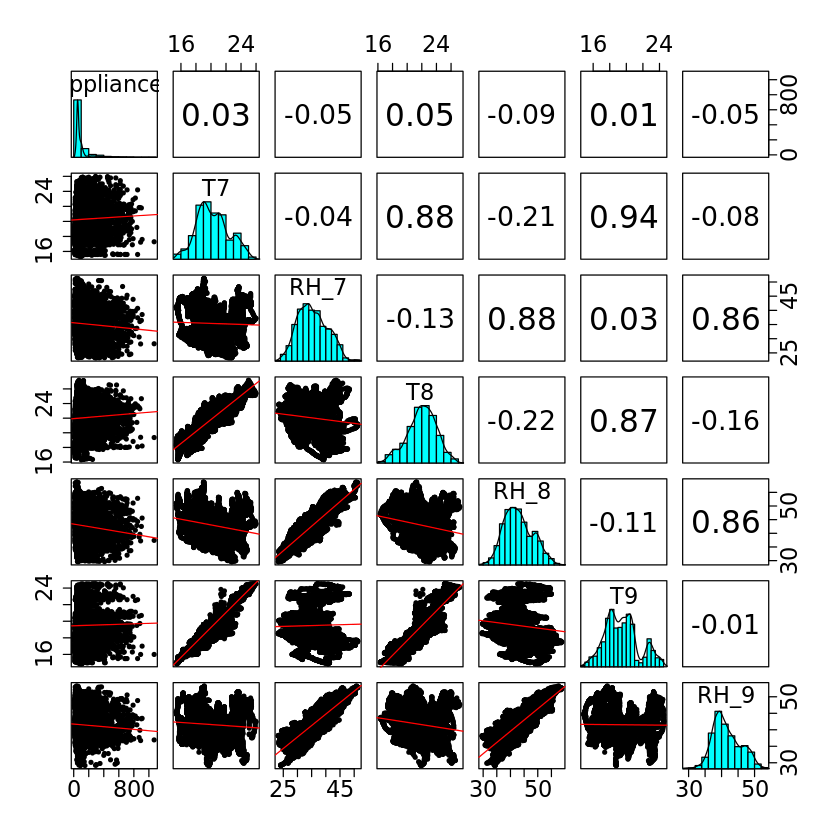

In [0]:
pairs.panels(train_data2[,c(2,16,17,18,19,20,21)],lm=TRUE,ellipses = FALSE,rug=FALSE,scale=FALSE,
             cex.cor=1.1,cex.labels=1.7, cex.axis=1.7)


In [0]:
rcorr(as.matrix(train_data[,c(2,16,17,18,19,20,21)]))


ERROR: Error in eval(expr, envir, enclos): could not find function "rcorr"


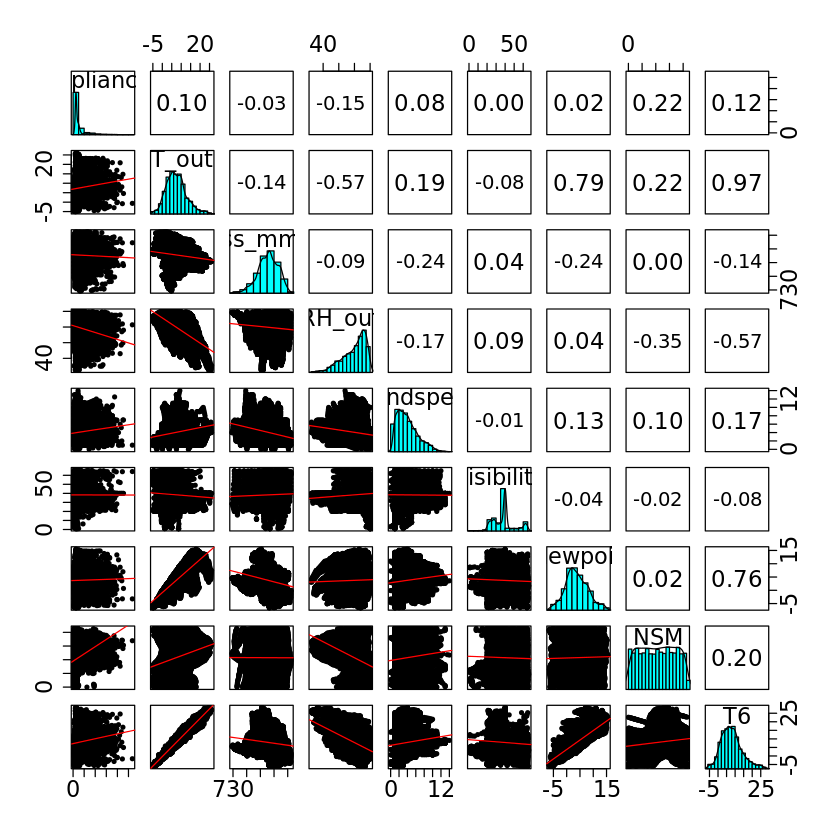

In [0]:
pairs.panels(train_data2[,c(2,22,23,24,25,26,27,30,14)],lm=TRUE,ellipses = FALSE,rug=FALSE,scale=FALSE,
             cex.cor=1.1,cex.labels=1.7, cex.axis=1.7)


In [0]:
rcorr(as.matrix(train_data[,c(2,22,23,24,25,26,27,30,14)]))


ERROR: Error in eval(expr, envir, enclos): could not find function "rcorr"


In [0]:
# Feature selection with Boruta

library(Boruta)
dim(train_data)
names(train_data[,c(2:32)])
str(train_data[,c(2:32)])


ERROR: Error in library(Boruta): there is no package called ‘Boruta’


In [0]:
# Running Boruta in a smaller training subset for speed 

set.seed(1234)
train_data_ss<- train_data[,c(2:32)][sample(1:nrow(train_data), 4440,
                                            replace=FALSE),]

dim(train_data_ss)

set.seed(1234)
Boruta.Appliances_ss    <- Boruta(Appliances~., data=train_data_ss,  
                                  doTrace = 2,ntree = 100)
Boruta.Appliances_ss    



[1] 4440   31

ERROR: Error in eval(expr, envir, enclos): could not find function "Boruta"


In [0]:
print(Boruta.Appliances_ss)
plot(Boruta.Appliances_ss)


ERROR: Error in print(Boruta.Appliances_ss): object 'Boruta.Appliances_ss' not found


In [0]:
par( mar=c(7.5, 5, 2, 1)) 
plot(Boruta.Appliances_ss,cex.axis=1,las=2,xlab="")


ERROR: Error in plot(Boruta.Appliances_ss, cex.axis = 1, las = 2, xlab = ""): object 'Boruta.Appliances_ss' not found


In [0]:
# Since rv1 and rv2 are not relevant, then removing them from the data sets
train_data2 <- train_data
train_data2 <- subset(train_data,select=-c(rv1,rv2))


In [0]:
str(train_data2)

test_data2 <-test_data
test_data2 <- subset(test_data,select=-c(rv1,rv2))
str(test_data2)


'data.frame':	14803 obs. of  30 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 60 60 60 70 430 90 80 140 ...
 $ lights     : int  30 30 40 50 40 40 50 10 30 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.8 ...
 $ RH_1       : num  47.6 46.7 46.3 45.6 45.6 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.5 44.5 44.4 ...
 $ T3         : num  19.8 19.8 19.8 19.7 19.7 ...
 $ RH_3       : num  44.7 44.8 45 44.9 44.8 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.5 45.9 45.8 ...
 $ T5         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 54.9 55 ...
 $ T6         : num  7.03 6.83 6.37 6.19 6.12 ...
 $ RH_6       : num  84.3 84.1 84.9 86.4 87.2 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.2 41.2 41.4 ...
 $ T8         : num  18.2 18.2 18.1 18.1 18.1 ...
 $ RH_8       : num  48.

In [0]:
names(train_data2)
str(train_data2)
dim(train_data2)

dim(test_data2)


[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "NSM"         "WeekStatus"  "Day_of_week"

'data.frame':	14803 obs. of  30 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 60 60 60 70 430 90 80 140 ...
 $ lights     : int  30 30 40 50 40 40 50 10 30 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.8 ...
 $ RH_1       : num  47.6 46.7 46.3 45.6 45.6 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.5 44.5 44.4 ...
 $ T3         : num  19.8 19.8 19.8 19.7 19.7 ...
 $ RH_3       : num  44.7 44.8 45 44.9 44.8 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.5 45.9 45.8 ...
 $ T5         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 54.9 55 ...
 $ T6         : num  7.03 6.83 6.37 6.19 6.12 ...
 $ RH_6       : num  84.3 84.1 84.9 86.4 87.2 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.2 41.2 41.4 ...
 $ T8         : num  18.2 18.2 18.1 18.1 18.1 ...
 $ RH_8       : num  48.

[1] 14803    30

[1] 4932   30

In [0]:
# adding dummy variables to use rfe from caret

library(dummies)
str(train_data)
head(train_data2)
str(train_data2)
new_train_data <- dummy.data.frame(train_data2,names=c("WeekStatus","Day_of_week"))
str(new_train_data)
dim(new_train_data)

ERROR: Error in library(dummies): there is no package called ‘dummies’


In [0]:
new_test_data <- dummy.data.frame(test_data2,names=c("WeekStatus","Day_of_week"))
str(new_test_data)
dim(new_test_data)

ERROR: Error in eval(expr, envir, enclos): could not find function "dummy.data.frame"


In [0]:
# using rfe # remember that all the fields need to be numeric
# rfe- recursive feature elimination

control <- rfeControl(functions=rfFuncs, method="cv", number=10)
#control <- rfeControl(functions=lmFuncs, method="repeatedcv",repeats=10)
# run the RFE algorithm
str(new_train_data)
head(new_train_data[,c(3:37)])
head(new_train_data[,2])
set.seed(1)
registerDoParallel(4)
getDoParWorkers()
ptm <- proc.time()
results <- rfe(new_train_data[,c(3:37)], new_train_data[,2] , sizes=c(1:35), rfeControl=control)
results_time <- proc.time() - ptm

print(results)

ERROR: Error in str(new_train_data): object 'new_train_data' not found


In [0]:
# list the chosen features
names(new_train_data[,c(3:37)])[!names(new_train_data[,c(3:37)]) %in% predictors(results)]

names(new_train_data[,c(3:37)])[!names(new_train_data[,c(3:37)]) %in% unique(vari[vari$Variables==30,]$var)]


selectedVars <- results$variables


ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
# Top 5 variables
bestVar5 <- results$control$functions$selectVar(selectedVars, 5)
bestVar5

# Top 20 variables
bestVar20 <- results$control$functions$selectVar(selectedVars, 20)
bestVar20
#


bestVar35 <- results$control$functions$selectVar(selectedVars, 35)
bestVar35
#

ERROR: Error in eval(expr, envir, enclos): object 'results' not found


In [0]:
# plot the results
plot(results, type=c("g", "o"))

results$optVariables
results$optsize
results$perfNames

results


ERROR: Error in plot(results, type = c("g", "o")): object 'results' not found


In [0]:
plot(results, type=c("g", "o"))

ERROR: Error in plot(results, type = c("g", "o")): object 'results' not found


In [0]:
# training gbm model


fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  
                           verboseIter = TRUE,returnResamp = "all")

gbmGrid <-  expand.grid(interaction.depth = c(1,3,5),
                        n.trees = seq(100,10901,400),
                        shrinkage = 0.1,
                        n.minobsinnode = c(10))


set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ptm <- proc.time()

[1] 4

In [0]:
gbm_model <- train(Appliances~., data=new_train_data[,c(2:37)],  method="gbm",
                   metric='RMSE',trControl = fitControl,bag.fraction=0.5,tuneGrid=gbmGrid)
gbm_time <- proc.time() - ptm

gbm_model$call


ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
#testing linear model in caret

lmcvFit <- train(Appliances~., data=new_train_data[,c(2:37)],  method="lm",trControl = fitControl,
                 metric='RMSE')

lmcvFit

summary(lmcvFit)

plot(lmcvFit)

residuals<-resid(lmcvFit)

predictedValues<-predict(lmcvFit)

plot(new_train_data$Appliances,residuals,xlab="Appliances Energy consumption", ylab="Residuals")

abline(0,0)

ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
plot(new_train_data$Appliances,residuals,xlab="Appliances Energy consumption", ylab="Residuals")
abline(0,0)

ERROR: Error in plot(new_train_data$Appliances, residuals, xlab = "Appliances Energy consumption", : object 'new_train_data' not found


In [0]:
# some more plots here
plot(new_train_data$Appliances,predictedValues)

lmcvFit$finalModel

varImp(lmcvFit)
length(varImp(lmcvFit))
plot(varImp(lmcvFit))


ERROR: Error in plot(new_train_data$Appliances, predictedValues): object 'new_train_data' not found


In [0]:
plot(gbm_model)

ERROR: Error in plot(gbm_model): object 'gbm_model' not found


In [0]:
plot(gbm_model)

ERROR: Error in plot(gbm_model): object 'gbm_model' not found


In [0]:
plot(varImp(gbm_model))


ERROR: Error in varImp(gbm_model): object 'gbm_model' not found


In [0]:
# best tunning parameters
gbm_model$bestTune


ERROR: Error in eval(expr, envir, enclos): object 'gbm_model' not found


In [0]:
descrCor <-  cor(train_data[,c(2:31)])
highCorr <- sum(abs(descrCor[upper.tri(descrCor)]) > .999)


ERROR: Error in cor(train_data[, c(2:31)]): 'x' must be numeric


In [0]:
library(Metrics)
predict(gbm_model,energy_data_tr[,c(2:36)])


ERROR: Error in library(Metrics): there is no package called ‘Metrics’


In [0]:
# in the training set
rmse(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))
# 17.56036
rmse(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))
# 66.65


ERROR: Error in eval(expr, envir, enclos): could not find function "rmse"


In [0]:

MAPE <- function(y, yhat) {
  mean(abs((y - yhat)/y))
}

MAE <- function(y, yhat) {
  mean(abs((y - yhat)))
}

MAPE2 <- function(y, yhat) {
  
  n <- length(y)
  su <- 0
  for (i in 1:n) {
    su <-su+ abs((y[i]-yhat[i])/y[i])
    
  }
  print (su/n)
}

In [0]:

MAE2 <- function(y, yhat) {
  
  n <- length(y)
  su <- 0
  for (i in 1:n) {
    su <-su+ abs((y[i]-yhat[i]))
    
  }
  print (su/n)
}



Rsqu <- function(y, yhat) {
  
  mdata <- mean(y)
  
  1 - sum((y-yhat)^2)/(sum((y-mdata)^2))
  
}


Rmse_f <- function(y, yhat) {
  
  sqrt(mean((y-yhat)^2))
  
}

In [0]:

MAPE(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))*100
# 0.1627125
MAPE(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))*100
# 0.3829354

MAE(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))
# 11.97
MAE2(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))
# 11.97

MAPE(c(1,2,3,4),c(0,2,3,4))


ERROR: Error in predict(gbm_model, new_train_data[, c(2:37)]): object 'gbm_model' not found


In [0]:

Rsqu(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))


MAPE2(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))


# Training SVM model



grid <- expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25)
)


set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ERROR: Error in predict(gbm_model, new_train_data[, c(2:37)]): object 'gbm_model' not found


In [0]:

ptm <- proc.time()
svm_model <- train(Appliances~., data=new_train_data[,c(2:37)],  method="svmRadial",
                   metric='RMSE',trControl = fitControl, preProc=c("center","scale"),
                   tuneGrid = grid)
svm_time <- proc.time() - ptm
svm_time
print(svm_model)
plot(svm_model)


grid2 <- expand.grid(sigma = c(0.1,0.25,0.30),
                     C = c( 1.1,1.5,1.8,2)
)
set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ptm <- proc.time()

ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
svm_model2 <- train(Appliances~., data=new_train_data[,c(2:37)],  method="svmRadial",
                    metric='RMSE',trControl = fitControl, preProc=c("center","scale"),
                    tuneGrid = grid2)
svm_time2 <- proc.time() - ptm
svm_time2
print(svm_model2)
plot(svm_model2)


ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
plot(svm_model2)

ERROR: Error in plot(svm_model2): object 'svm_model2' not found


In [0]:
grid3 <- expand.grid(sigma = c(0.35,0.4,0.1),
                     C = c(1,3.0,5.0,8.0,10,12)
)

In [0]:
set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ptm <- proc.time()
svm_model3 <- train(Appliances~., data=new_train_data[,c(2:37)],  method="svmRadial",
                    metric='RMSE',trControl = fitControl, preProc=c("center","scale"),
                    tuneGrid = grid3)
svm_time3 <- proc.time() - ptm
svm_time3
print(svm_model3)
plot(svm_model3)

[1] 4

ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
plot(svm_model3)

ERROR: Error in plot(svm_model3): object 'svm_model3' not found


In [0]:
plot(gbm_model)

rvalues <- resamples(list(svm=svm_model3,gbm=gbm_model,lm=lmcvFit))


rvalues$values

dotplot(rvalues,metric = "RMSE")


ERROR: Error in plot(gbm_model): object 'gbm_model' not found


In [0]:
# tRAINING THE rf MODEL
fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  # 10,3
                           verboseIter = TRUE,returnResamp = "all")
set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ptm <- proc.time()

rf_default <- train(Appliances~., data=new_train_data[,c(2:37)],
                    method="rf",metric='RMSE',
                    trControl=fitControl,importance = TRUE )

rf_default_time <- proc.time() - ptm
rf_default 
rf_default_time
plot(rf_default)

[1] 4

ERROR: Error in eval(expr, envir, enclos): object 'new_train_data' not found


In [0]:
print(rf_default)
plot(rf_default)




ERROR: Error in print(rf_default): object 'rf_default' not found


In [0]:
library(gridBase)
library(gridExtra)
library(lattice)
x <-1:500
y <- sqrt(rf_default$finalModel$mse)
n_trees <- xyplot(y ~ x, 
                  ylab="RMSE", xlab="Number of Trees")
dev.off()
rf_g <-plot(1:500,sqrt(rf_default$finalModel$mse),type='l',col='blue',axes=TRUE,xlab="Number of Trees",ylab="RMSE")

tress_g <- plot(rf_default)

class(tress_g)

panel_plot <- grid.arrange(n_trees, tress_g,ncol=2)


ERROR: Error in eval(expr, envir, enclos): object 'rf_default' not found


In [0]:
plot(varImp(rf_default))
plot(varImp(svm_model))
plot(varImp(gbm_model))

rvalues <- resamples(list(SVM_Radial=svm_model3,GBM=gbm_model,Lm=lmcvFit,RF=rf_default))

rvalues$values

RMSE_ALL <- dotplot(rvalues,metric = "RMSE")


RSQ_ALL <- dotplot(rvalues,metric="Rsquared")

panel_plot_models <- grid.arrange(RMSE_ALL, RSQ_ALL,ncol=2)
panel_plot_models


ERROR: Error in varImp(rf_default): object 'rf_default' not found


In [0]:


rmse(train_data2$Appliances,predict(lmcvFit,new_train_data[,c(2:37)]))
# 93.20819

Rmse_f(train_data2$Appliances,predict(lmcvFit,new_train_data[,c(2:37)]))

MAE(train_data2$Appliances,predict(lmcvFit,new_train_data[,c(2:37)]))
#53.13

MAPE(train_data2$Appliances,predict(lmcvFit,new_train_data[,c(2:37)]))*100
# 61.32
Rsqu(train_data2$Appliances,predict(lmcvFit,new_train_data[,c(2:37)]))
# 0.18

rmse(test_data2$Appliances,predict(lmcvFit,new_test_data[,c(2:37)]))
# 93.17608 

MAE(test_data2$Appliances,predict(lmcvFit,new_test_data[,c(2:37)]))
# 51.97

MAPE(test_data2$Appliances,predict(lmcvFit,new_test_data[,c(2:37)]))*100
# 59.93

Rsqu(test_data2$Appliances,predict(lmcvFit,new_test_data[,c(2:37)]))
#0.16


rmse(train_data2$Appliances,predict(svm_model3,new_train_data[,c(2:37)]))
# 39.35
Rmse_f(train_data2$Appliances,predict(svm_model3,new_train_data[,c(2:37)]))


MAE(train_data2$Appliances,predict(svm_model3,new_train_data[,c(2:37)]))
# 15.08

MAPE(train_data2$Appliances,predict(svm_model3,new_train_data[,c(2:37)]))*100
#15.60
Rsqu(train_data2$Appliances,predict(svm_model3,new_train_data[,c(2:37)]))
# 0.85


rmse(test_data2$Appliances,predict(svm_model3,new_test_data[,c(2:37)]))
# 70.74
MAE(test_data2$Appliances,predict(svm_model3,new_test_data[,c(2:37)]))
#  31.36

MAPE(test_data2$Appliances,predict(svm_model3,new_test_data[,c(2:37)]))*100
#29.76
Rsqu(test_data2$Appliances,predict(svm_model3,new_test_data[,c(2:37)]))
# 0.5152



set.seed(1)
rmse(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))
# 17.56

MAE(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))
# 11.97

set.seed(1)
MAPE2(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))*100
MAPE(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))*100

set.seed(1)
Rsqu(train_data2$Appliances,predict(gbm_model,new_train_data[,c(2:37)]))


#16.27
set.seed(1)
rmse(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))
# 66.65093
set.seed(1)
MAE(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))

MAPE(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))*100
MAPE2(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))*100
# 38.29 
set.seed(1)
Rsqu(test_data2$Appliances,predict(gbm_model,new_test_data[,c(2:37)]))
#0.57


rf_default

set.seed(1)
rmse(train_data2$Appliances,predict(rf_default,new_train_data[,c(2:37)]))
# 29.61314
set.seed(1)
MAE(train_data2$Appliances,predict(rf_default,new_train_data[,c(2:37)]))
# 13.75

set.seed(1)
MAPE(train_data2$Appliances,predict(rf_default,new_train_data[,c(2:37)]))*100
# 13.43
set.seed(1)
Rsqu(train_data2$Appliances,predict(rf_default,new_train_data[,c(2:37)]))
# 0.917


set.seed(1)
rmse(test_data2$Appliances,predict(rf_default,new_test_data[,c(2:37)]))
# 68.48478

set.seed(1)
MAE(test_data2$Appliances,predict(rf_default,new_test_data[,c(2:37)]))
# 31.85
set.seed(1)
MAPE(test_data2$Appliances,predict(rf_default,new_test_data[,c(2:37)]))*100
# 31.39

set.seed(1)
Rsqu(test_data2$Appliances,predict(rf_default,new_test_data[,c(2:37)]))
#0.54


RF_imp   <- plot(varImp(rf_default),main="RF Variable Importance")
SVM_imp  <- plot(varImp(svm_model3),main="SVM Variable Importance")
gbm_imp  <- plot(varImp(gbm_model),main="GBM Variable Importance")


panelVIMP_plot_models <- grid.arrange(RF_imp, gbm_imp,SVM_imp,ncol=3)

ggsave(file="panel_plot_VIMP2.png", panelVIMP_plot_models)


# 

#Now only with temperature and weather data (no lights from submetering)
names(new_train_data)

new_train_data_b <- subset(new_train_data,select=-c(lights))

str(new_train_data_b)
names(new_train_data_b)



new_test_data_b <- subset(new_test_data,select=-c(lights))
names(new_test_data_b)

#Training gbm model without light


fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  
                           verboseIter = TRUE,returnResamp = "all")

gbmGrid <-  expand.grid(interaction.depth = c(1,3,5),
                        n.trees = seq(100,10901,400),
                        shrinkage = 0.1,
                        n.minobsinnode = c(10))


set.seed(1)
registerDoParallel(4)
getDoParWorkers()

ptm <- proc.time()

gbm_model_no_lights <- train(Appliances~., data=new_train_data_b[,c(2:36)],  method="gbm",
                             metric='RMSE',trControl = fitControl,bag.fraction=0.5,tuneGrid=gbmGrid)
gbm_time_no_lights <- proc.time() - ptm

plot(gbm_model_no_lights)

gbm_model_no_lights$call


dim(new_train_data_b)


ERROR: Error in eval(expr, envir, enclos): could not find function "rmse"
